In [95]:
dataset=pd.read_csv("speechsentiment.csv")
dataset.head()

dataset.dropna(inplace=True)

dfs = []


grouped = dataset.groupby('Title')

# Iterate over each group
for _, group in grouped:
    # Calculate the number of chunks of 32 rows for this group
    num_chunks = len(group) // 32
    
    # Split the group into chunks of 32 rows and add them to the list
    for i in range(num_chunks):
        chunk = group.iloc[i*32:(i+1)*32]
        dfs.append(chunk)


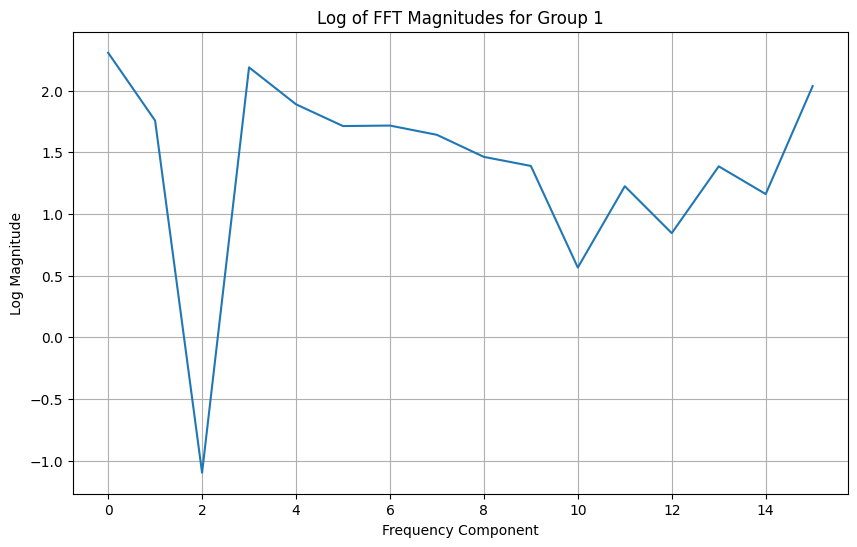

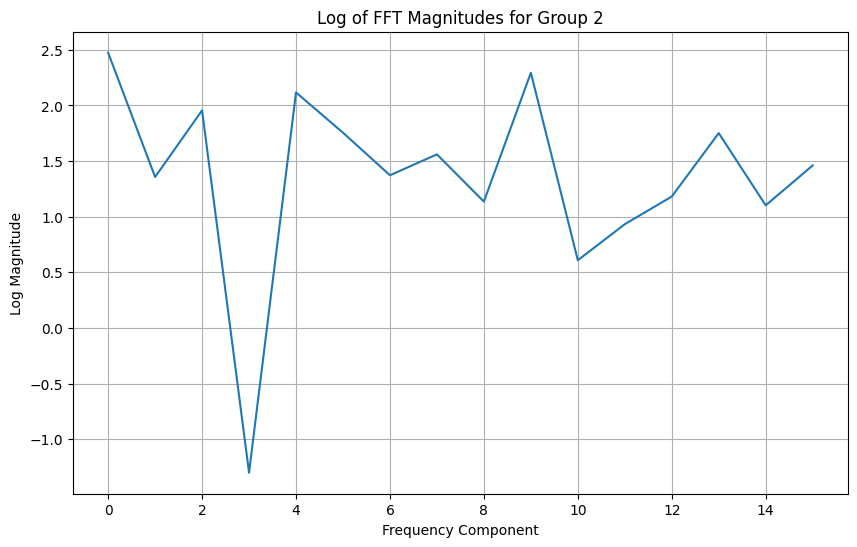

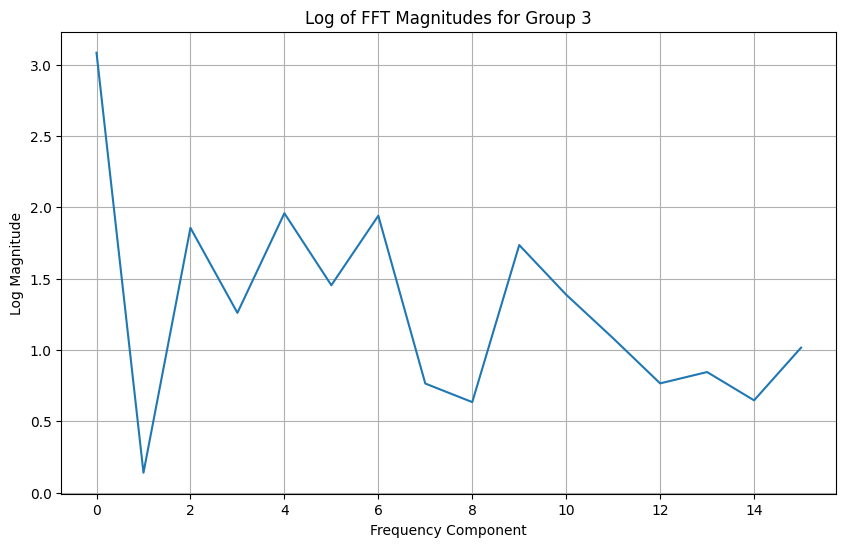

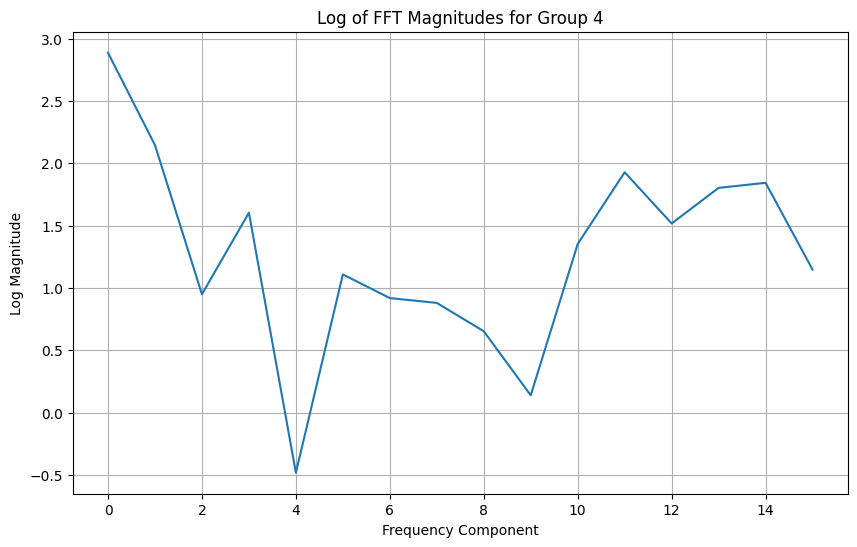

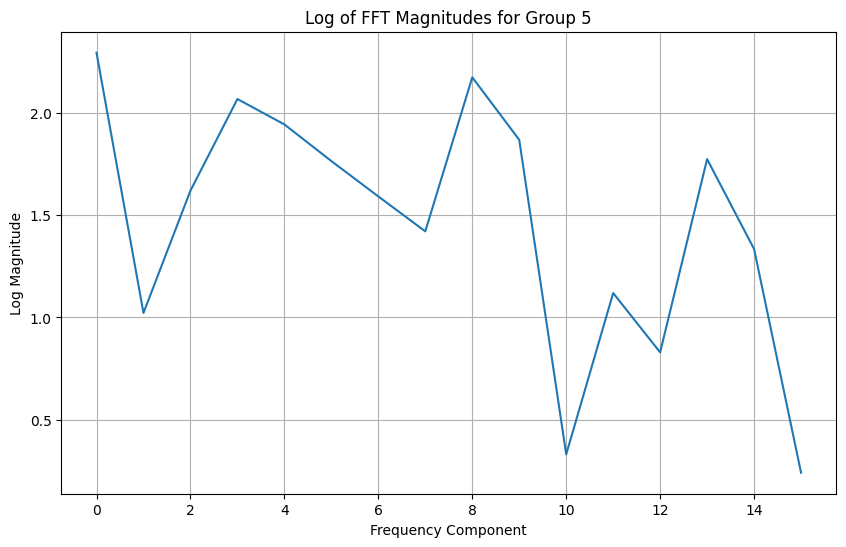

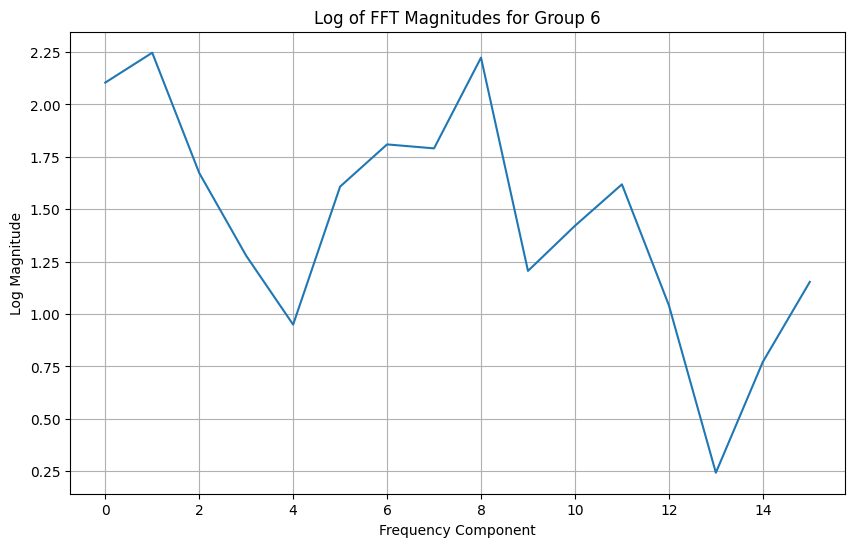

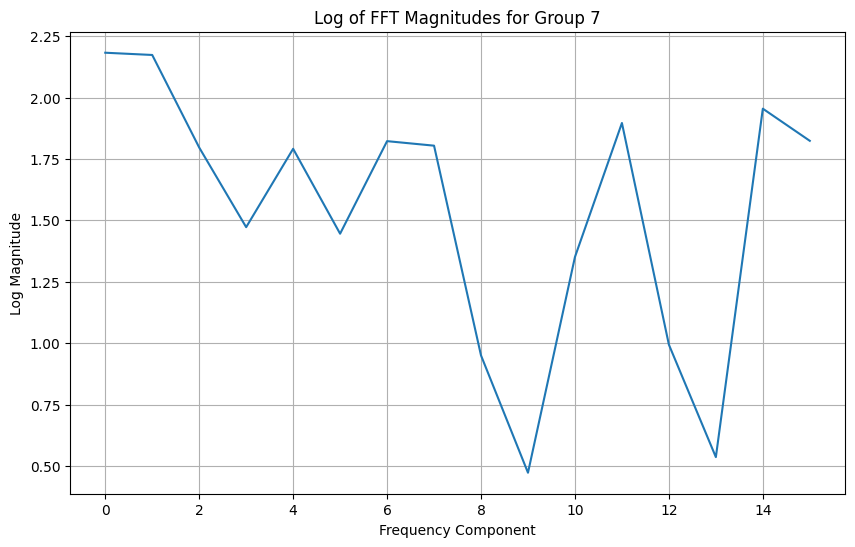

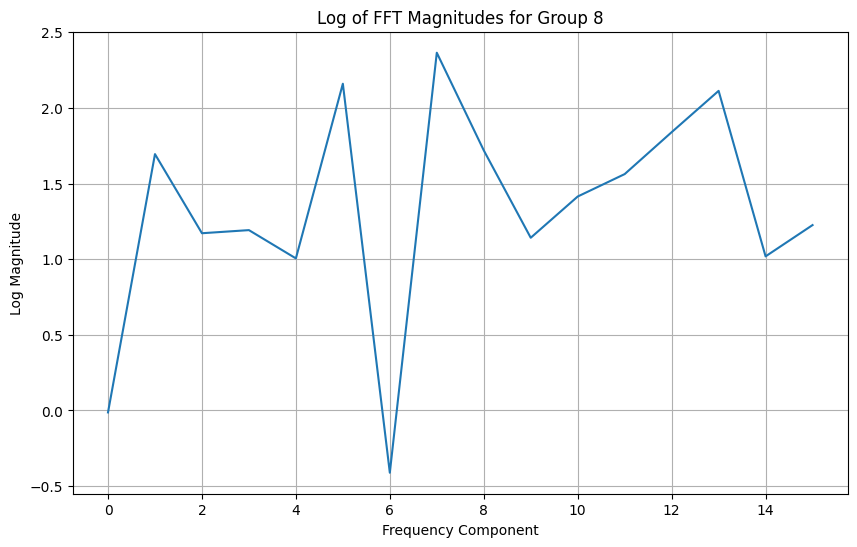

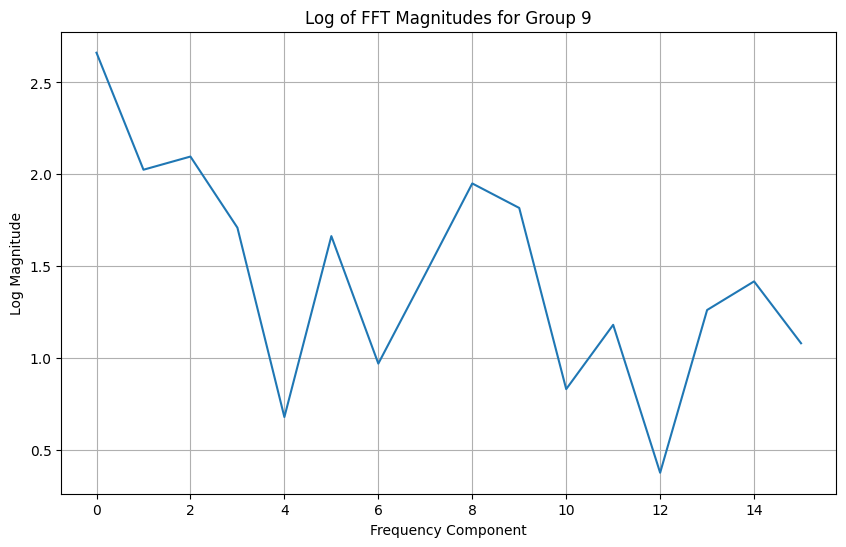

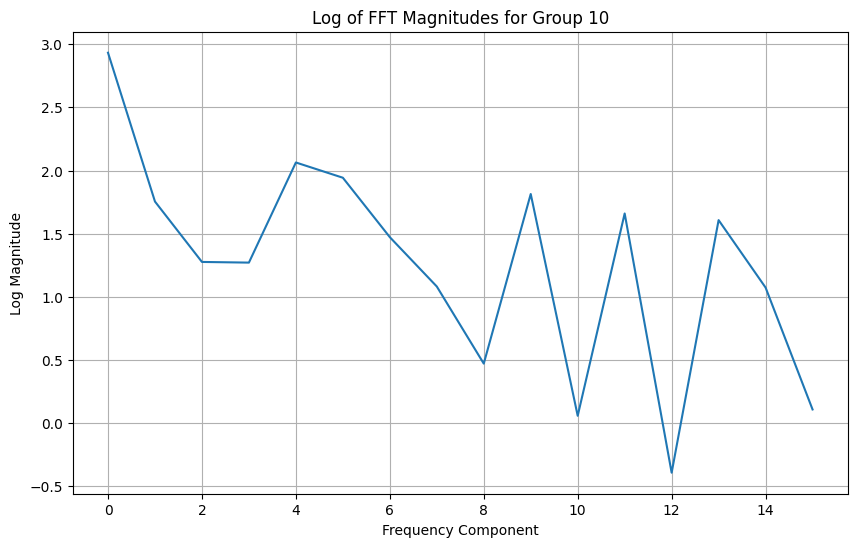

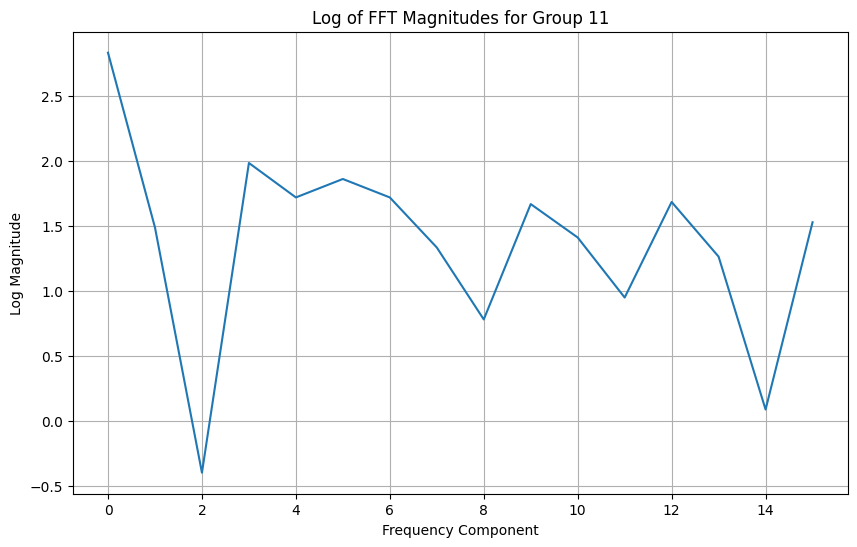

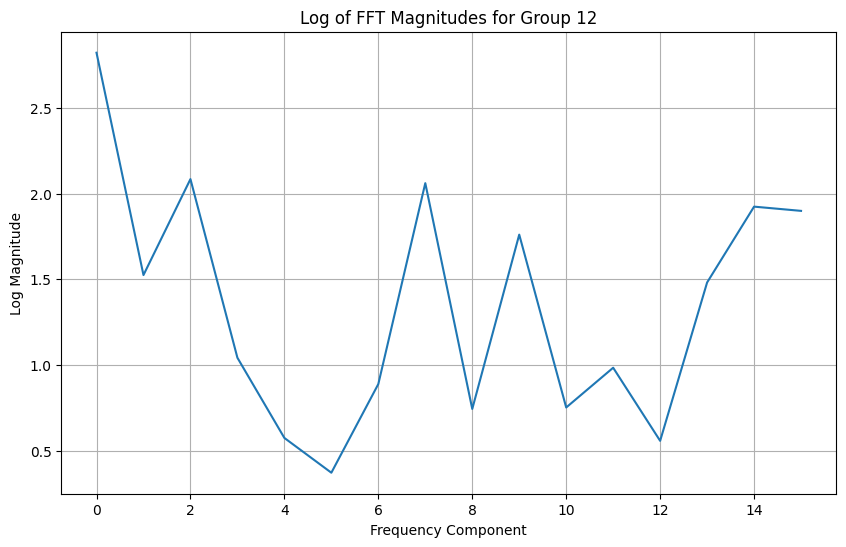

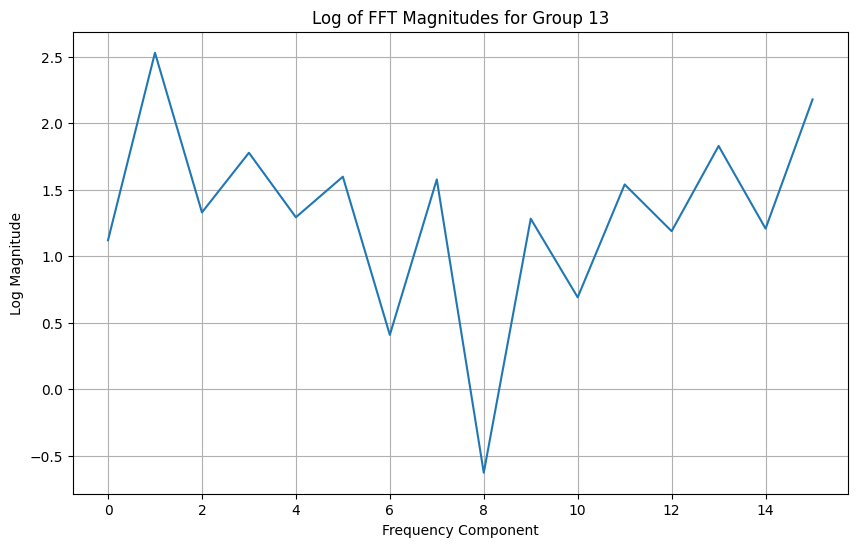

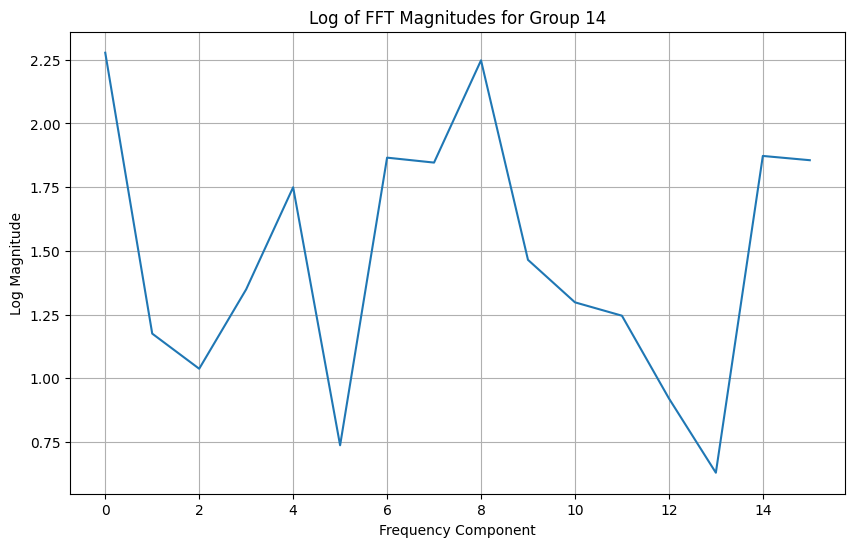

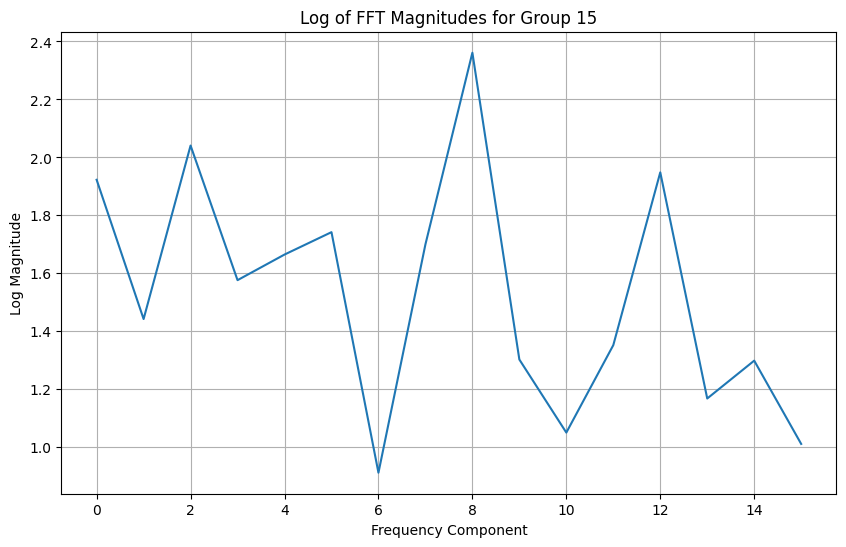

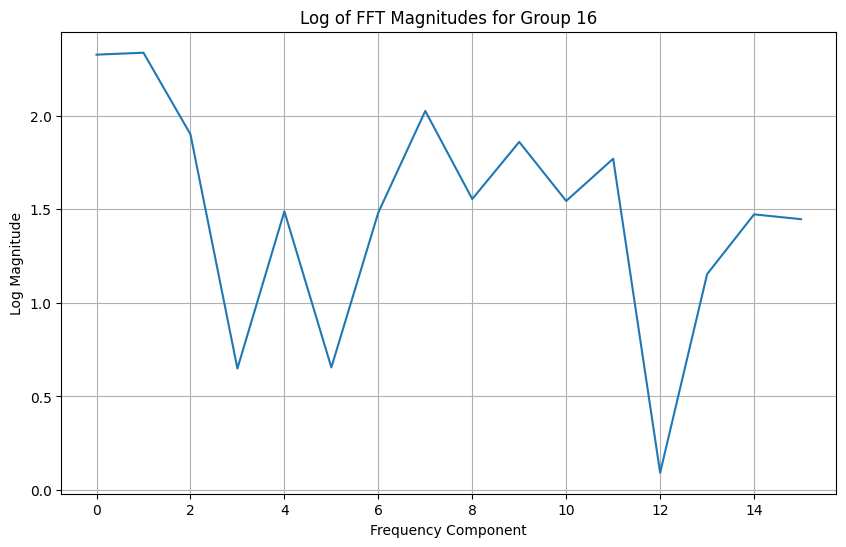

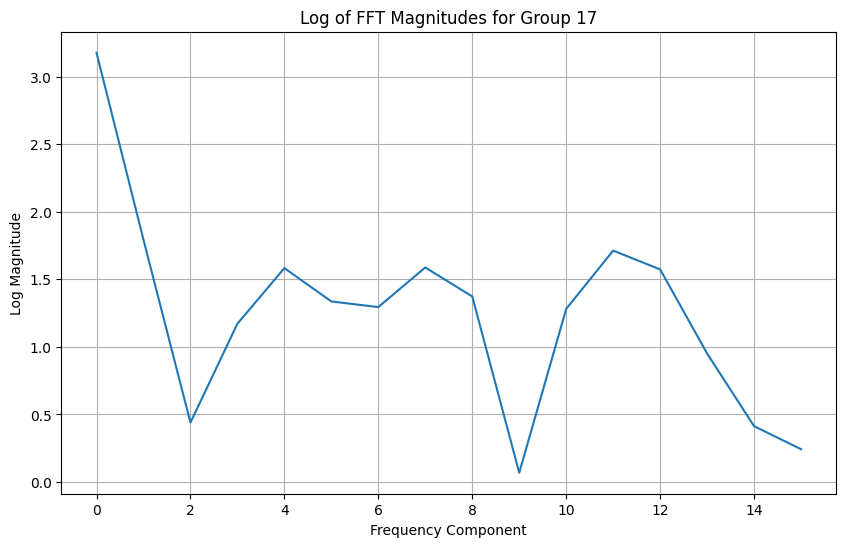

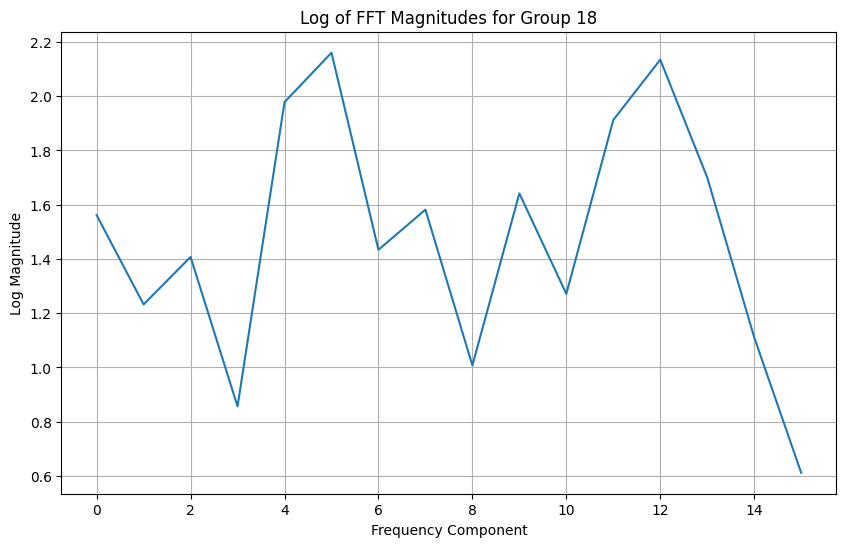

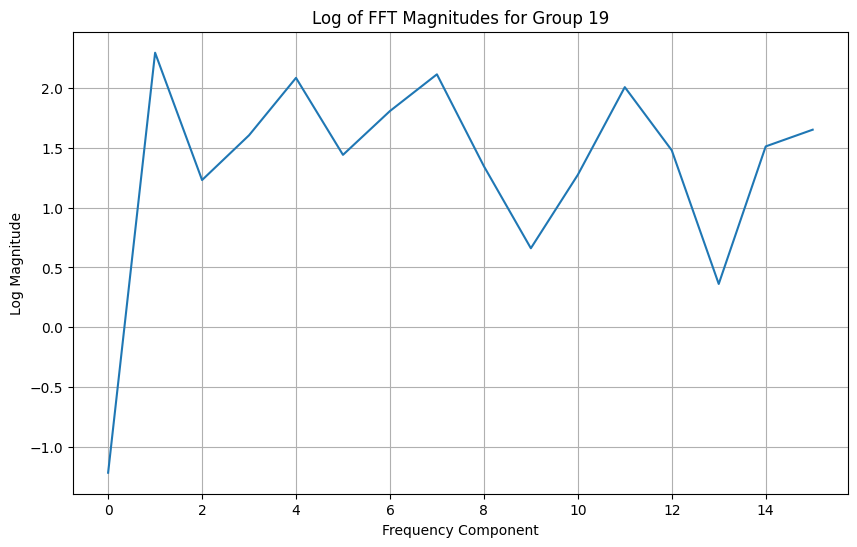

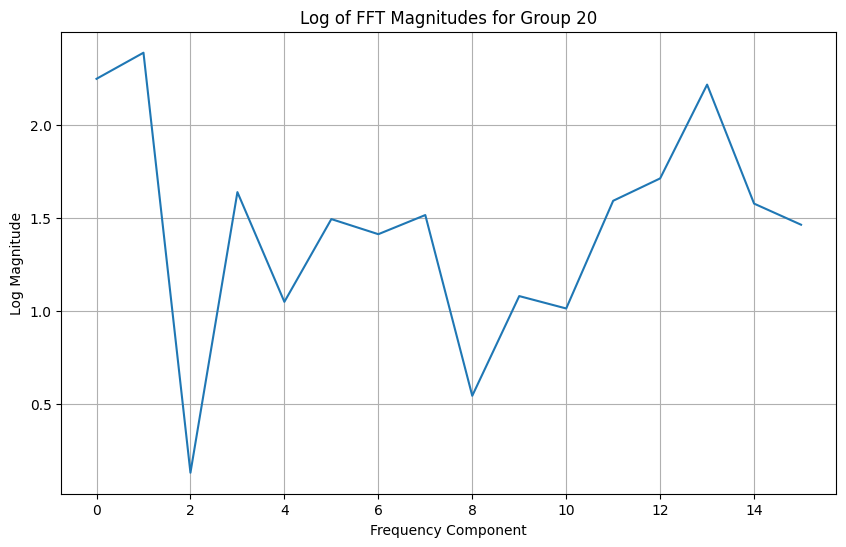

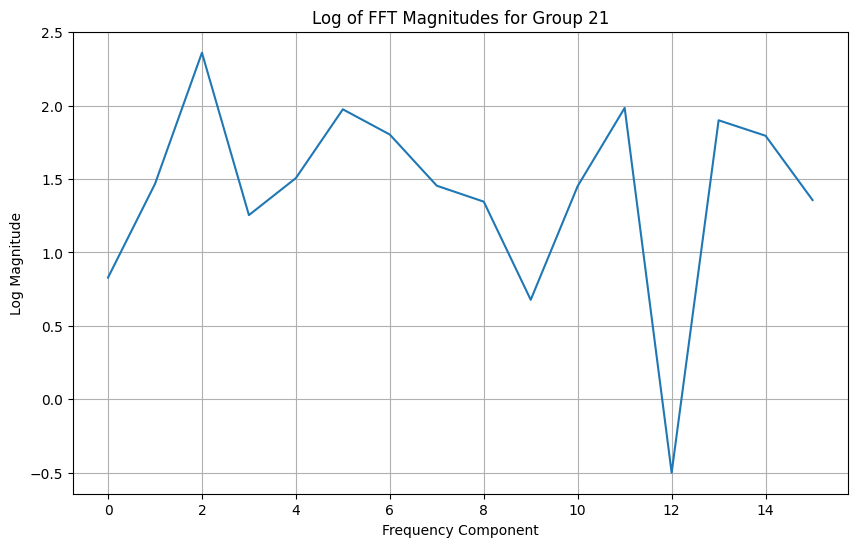

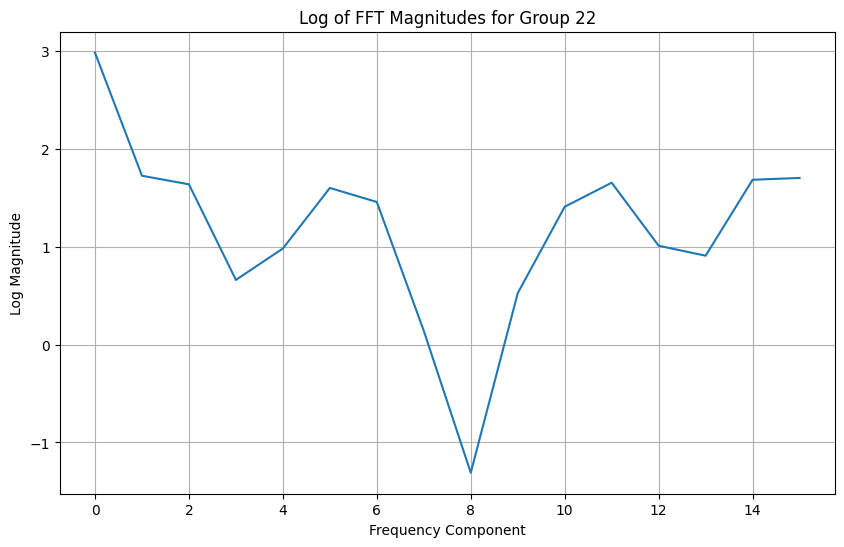

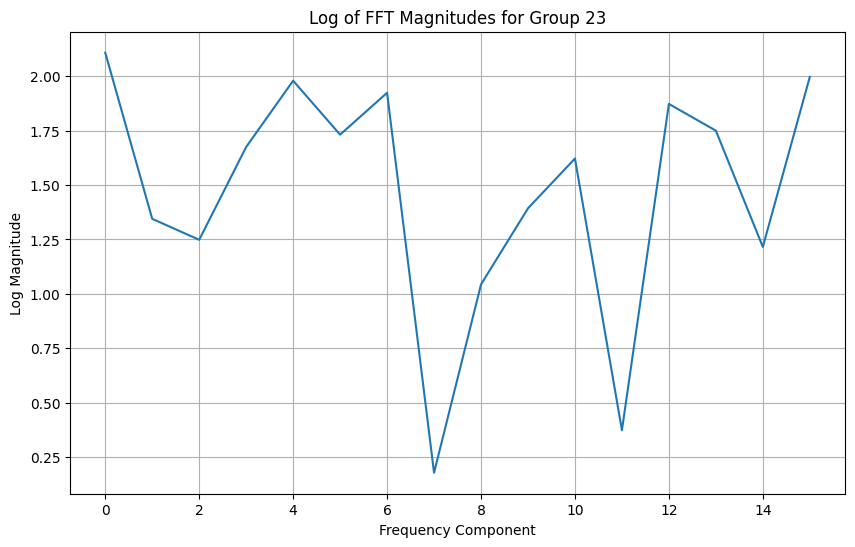

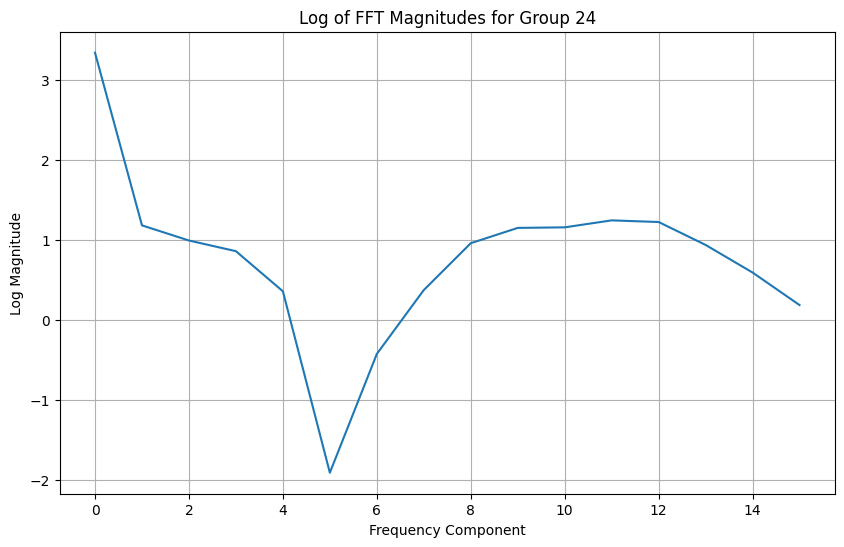

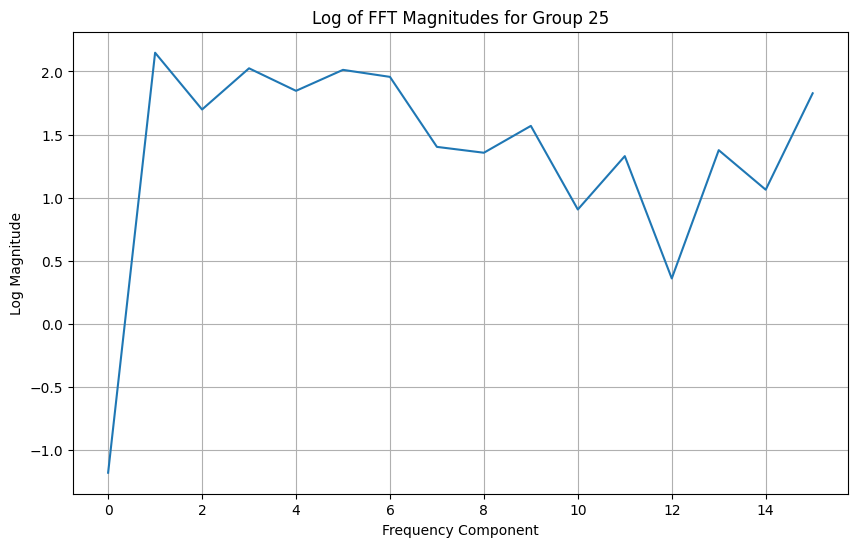

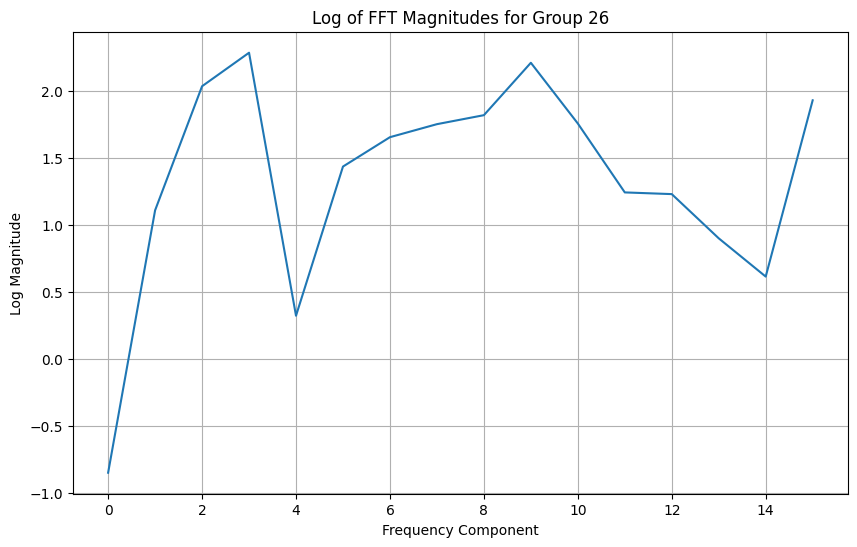

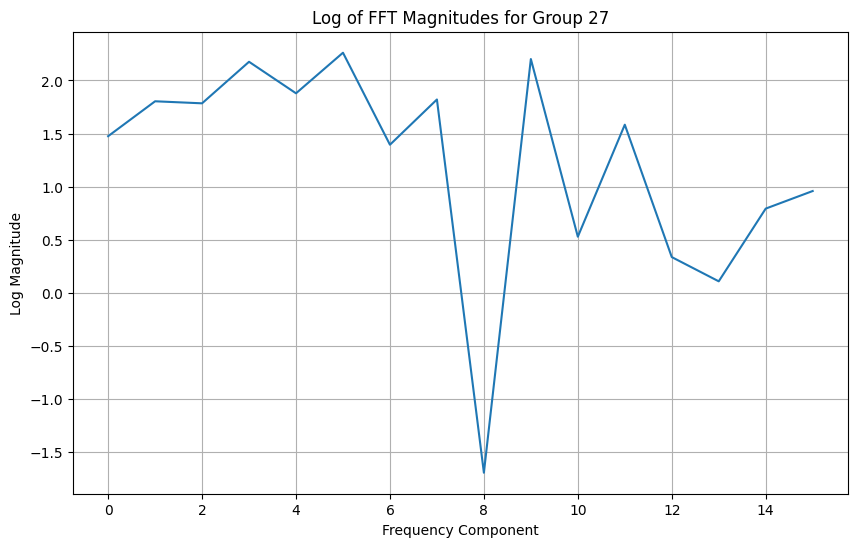

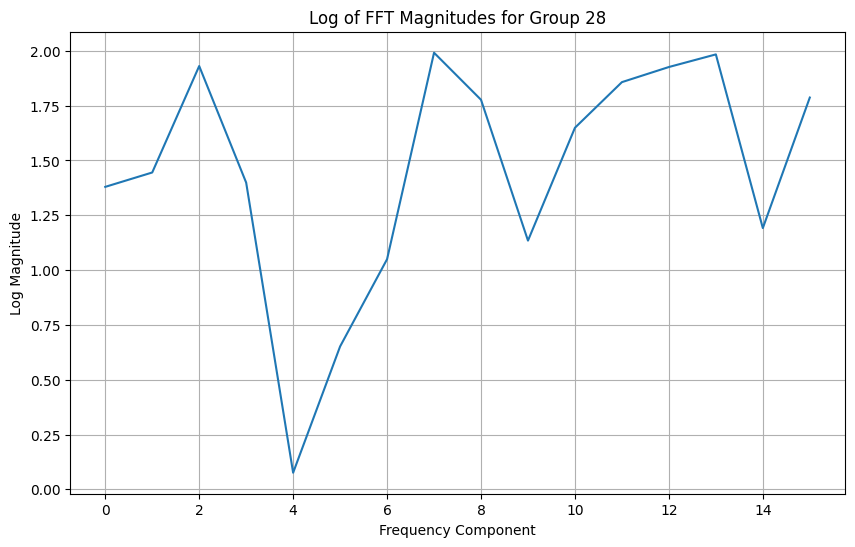

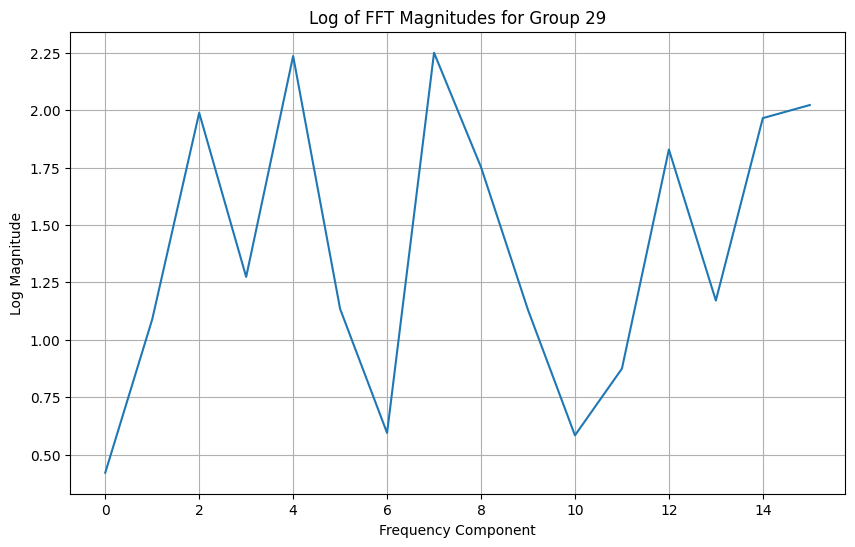

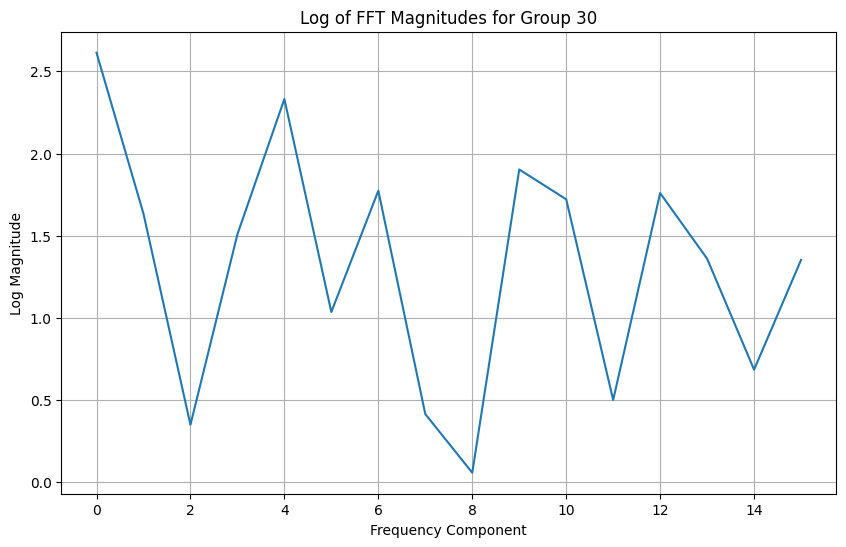

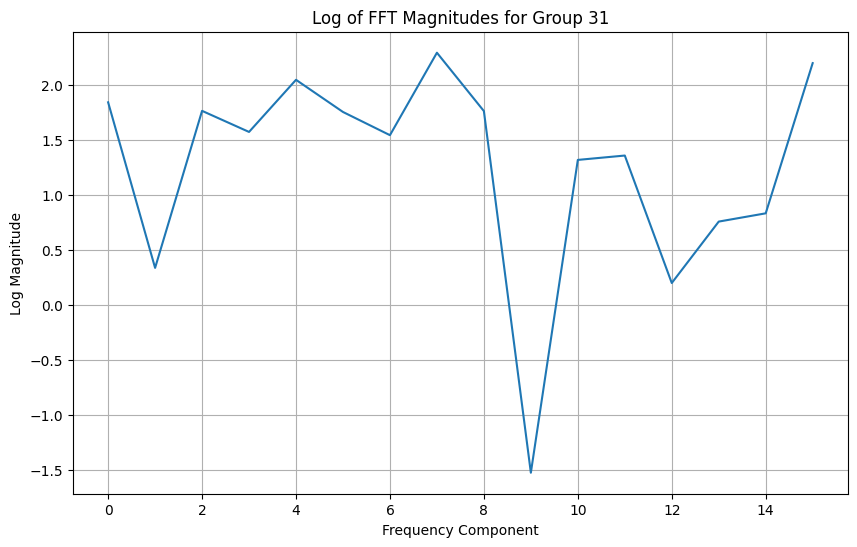

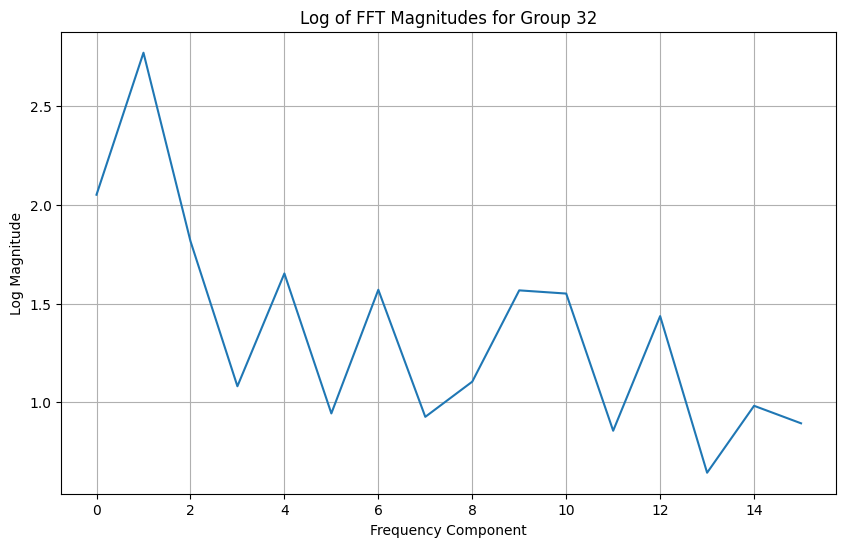

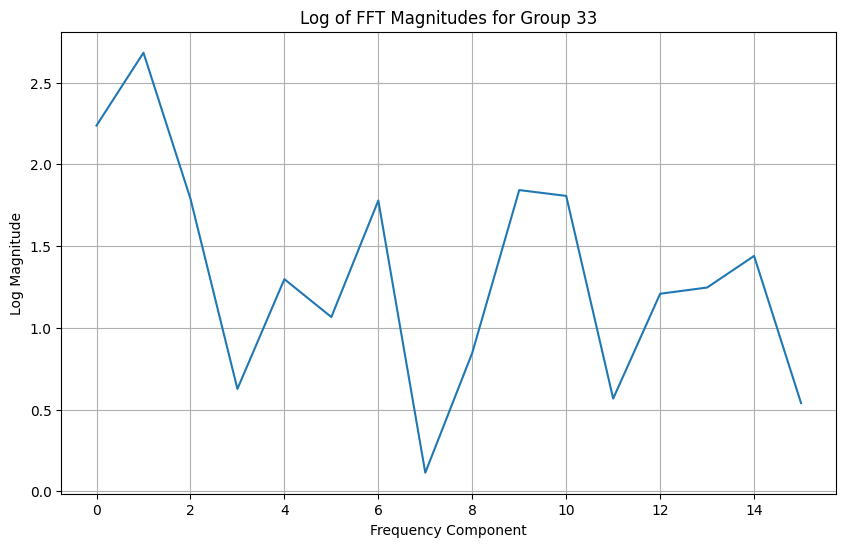

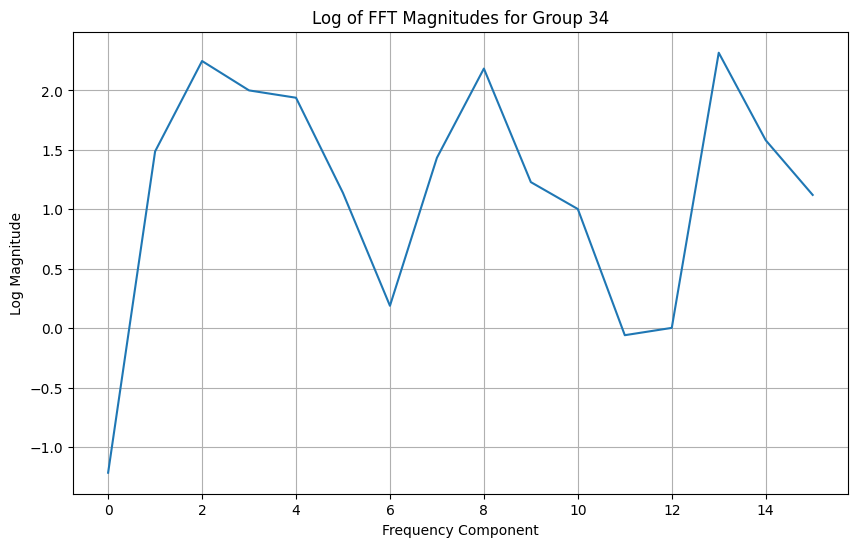

In [96]:
import numpy as np
import matplotlib.pyplot as plt

def plot_fft(dataframe, title):
    # Perform FFT on the 'sentiment' column
    fft_result = np.fft.fft(dataframe['sentiment'].values)
    
    # Compute magnitudes
    fft_magnitudes = np.abs(fft_result)
    
    # Compute logarithm of magnitudes to enhance visibility, avoid log(0) by adding a small number
    log_fft_magnitudes = np.log(fft_magnitudes[:len(fft_magnitudes)//2] + 1e-9)
    plt.figure(figsize=(10, 6))
    plt.plot(log_fft_magnitudes)
    plt.title(f'Log of FFT Magnitudes for {title}')
    plt.xlabel('Frequency Component')
    plt.ylabel('Log Magnitude')
    plt.grid(True)
    plt.show()


for i, df in enumerate(dfs):
    plot_fft(df, f"Group {i+1}")


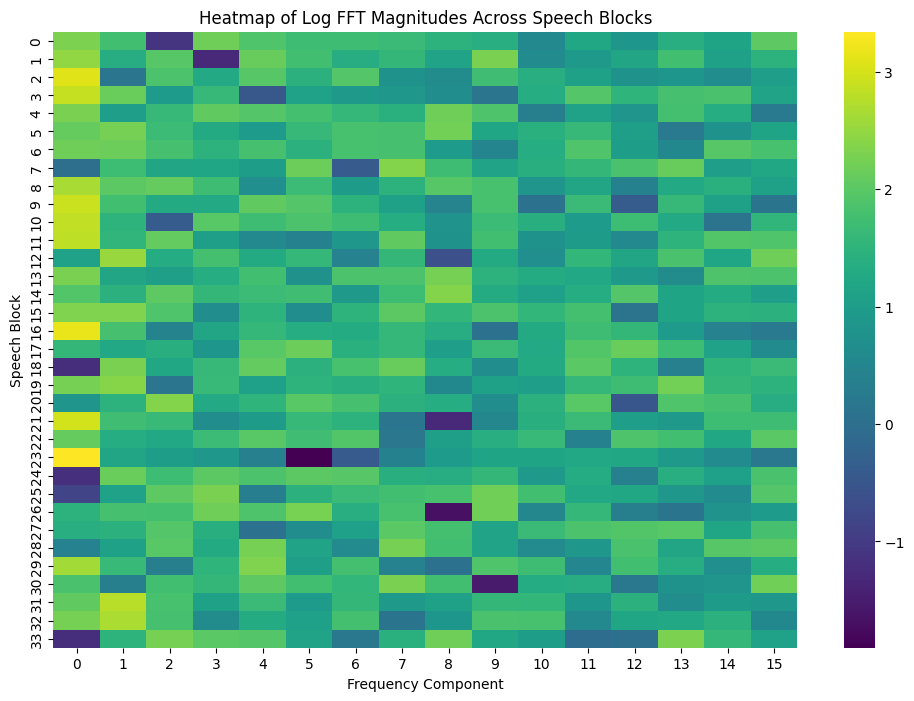

In [97]:
import numpy as np

def compute_log_fft_magnitudes(dataframe):
    # Perform FFT on the 'sentiment' column
    fft_result = np.fft.fft(dataframe['sentiment'].values)
    
    # Compute magnitudes and then the logarithm of these magnitudes
    fft_magnitudes = np.abs(fft_result)
    log_fft_magnitudes = np.log(fft_magnitudes[:len(fft_magnitudes)//2] + 1e-9)
    
    return log_fft_magnitudes
log_fft_magnitudes_list = [compute_log_fft_magnitudes(df) for df in dfs]
log_fft_magnitudes_matrix = np.vstack(log_fft_magnitudes_list)
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(log_fft_magnitudes_matrix, cmap='viridis', cbar=True)
plt.title('Heatmap of Log FFT Magnitudes Across Speech Blocks')
plt.xlabel('Frequency Component')
plt.ylabel('Speech Block')
plt.show()


In [98]:
dfs = []


grouped = dataset.groupby('Title')
for _, group in grouped:
    num_chunks = len(group) // 16
    

    for i in range(num_chunks):
        chunk = group.iloc[i*16:(i+1)*16]
        dfs.append(chunk)


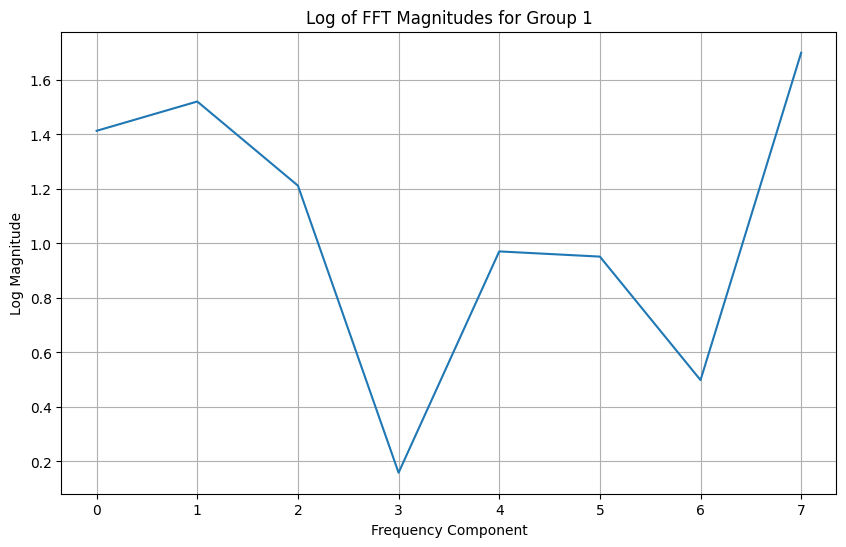

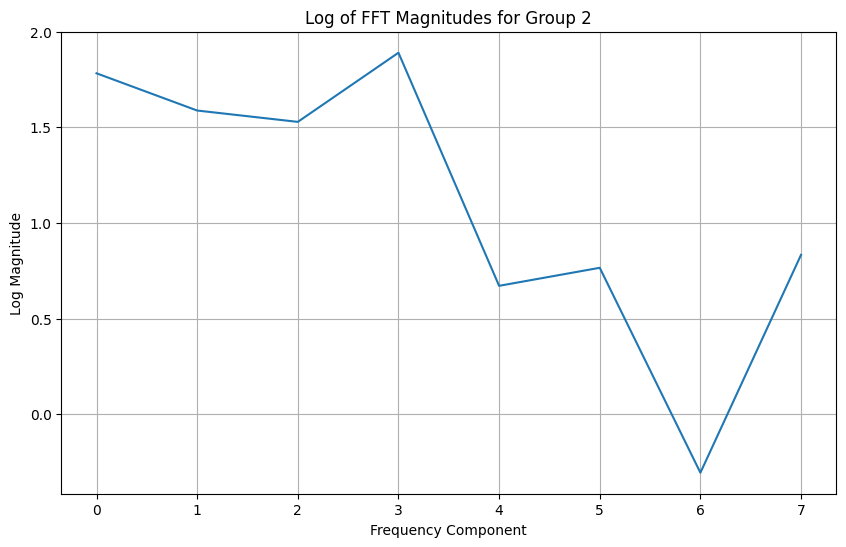

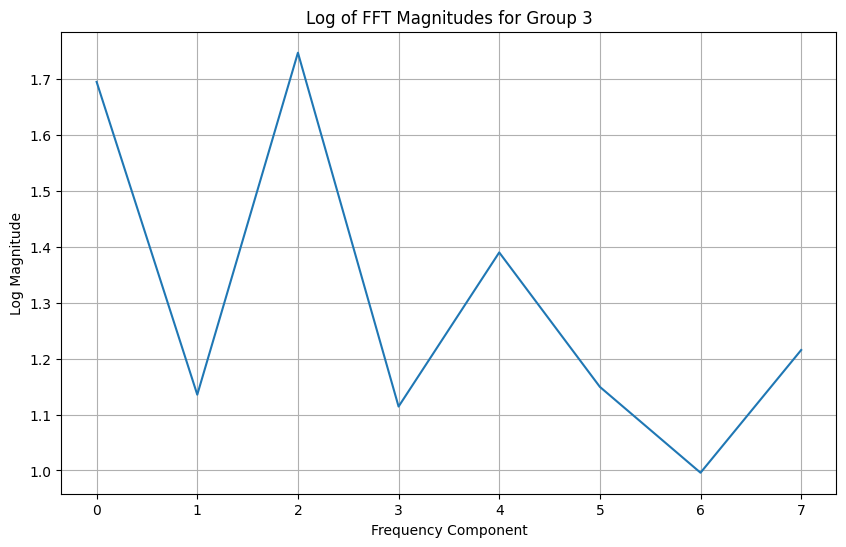

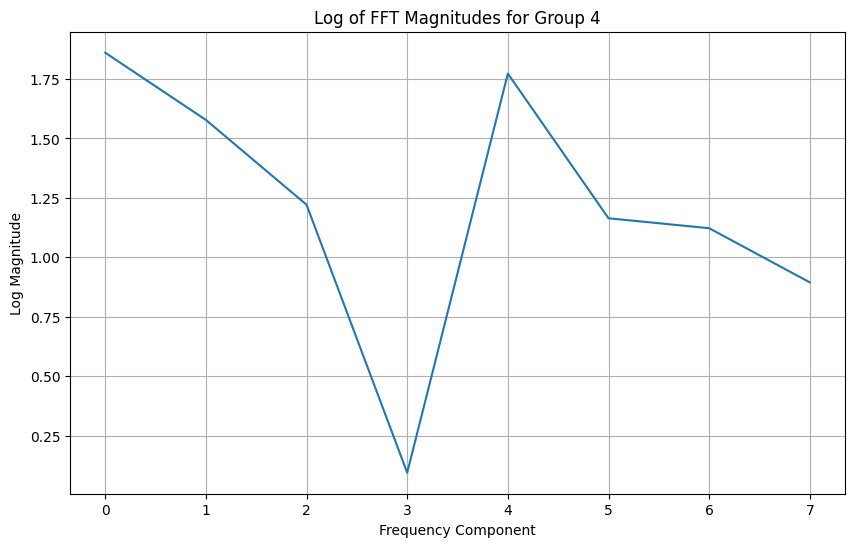

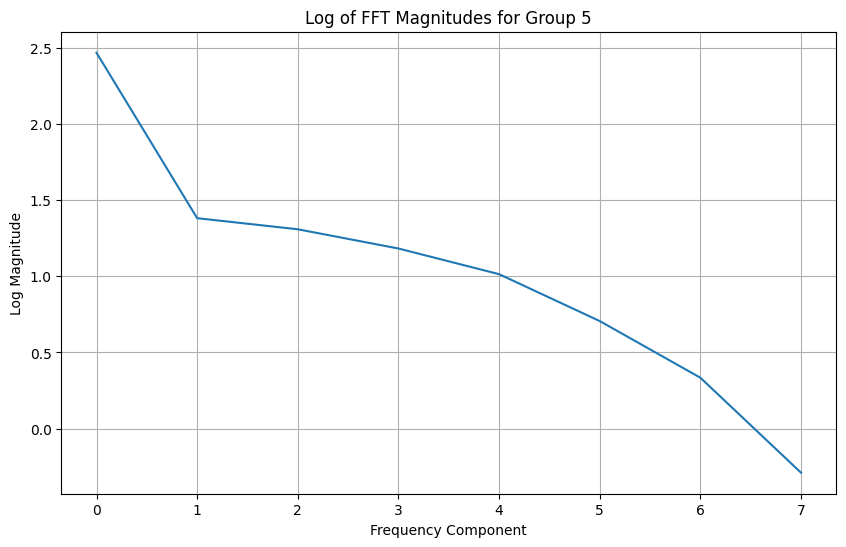

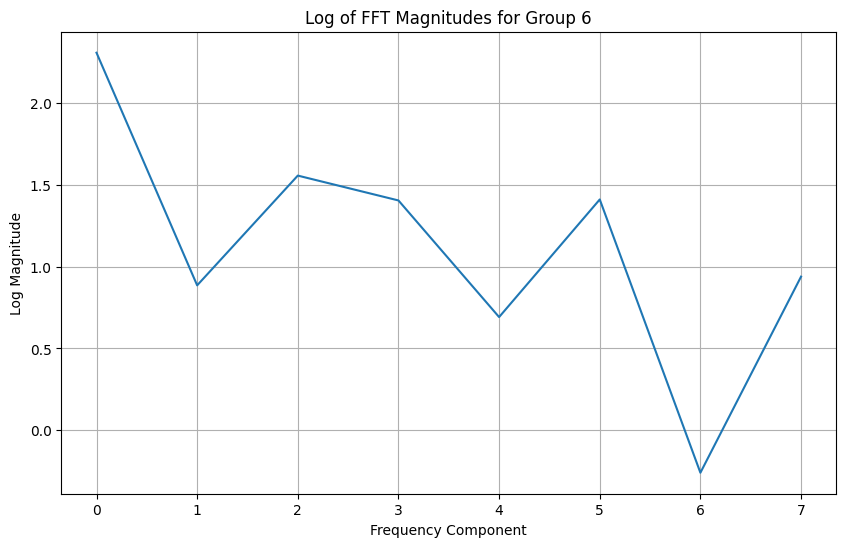

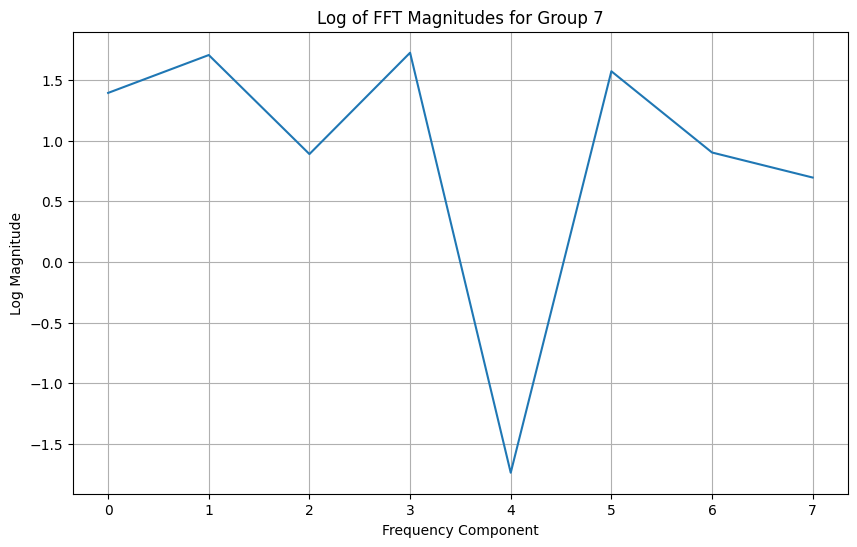

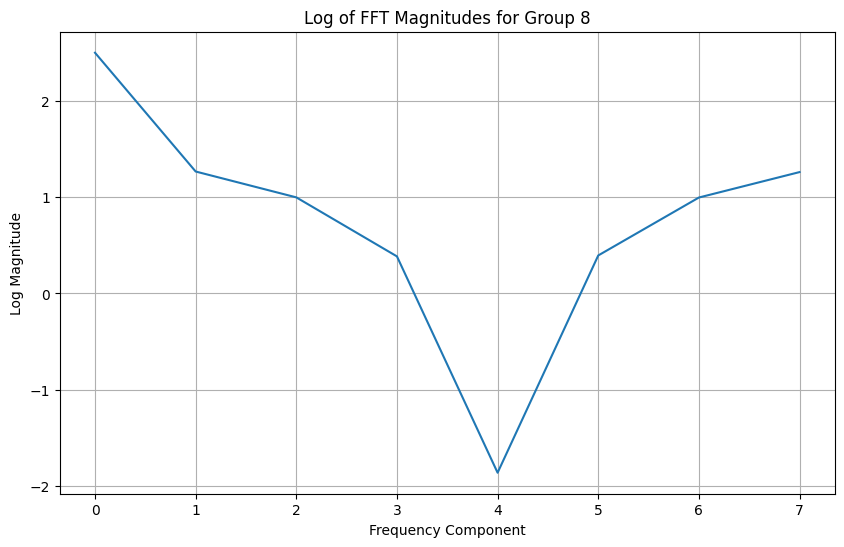

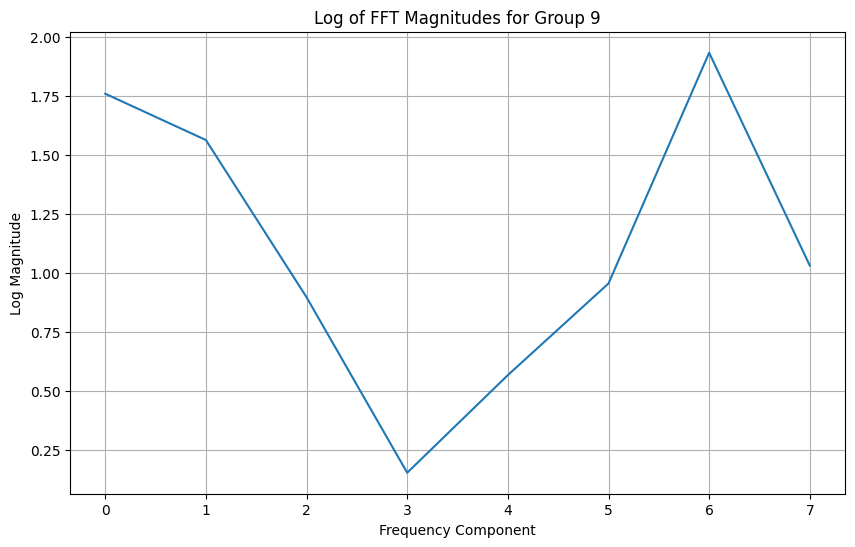

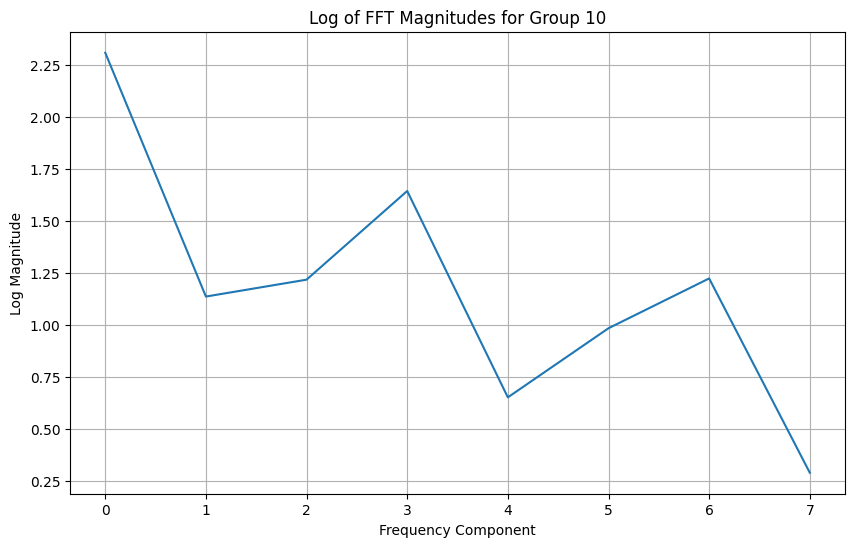

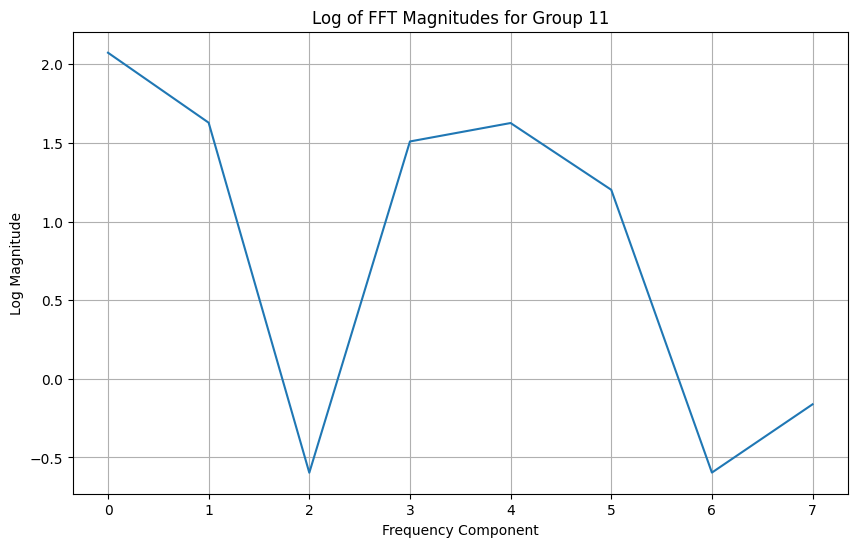

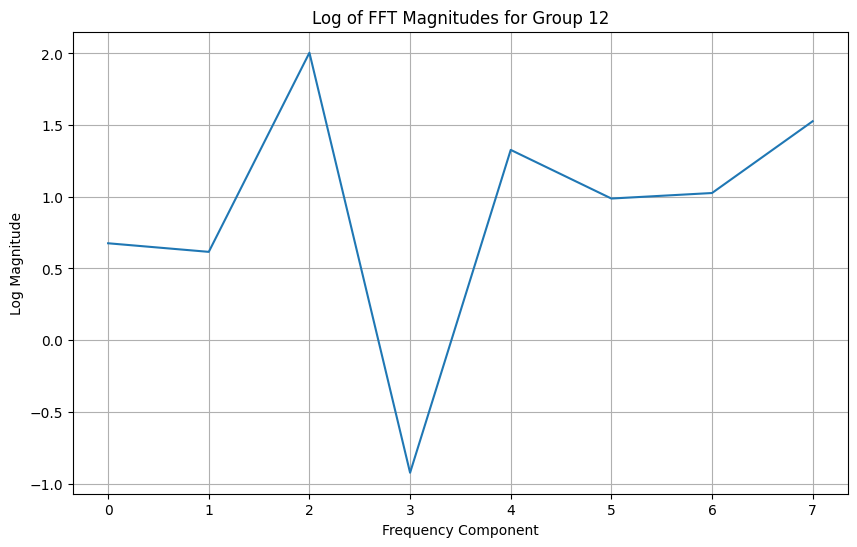

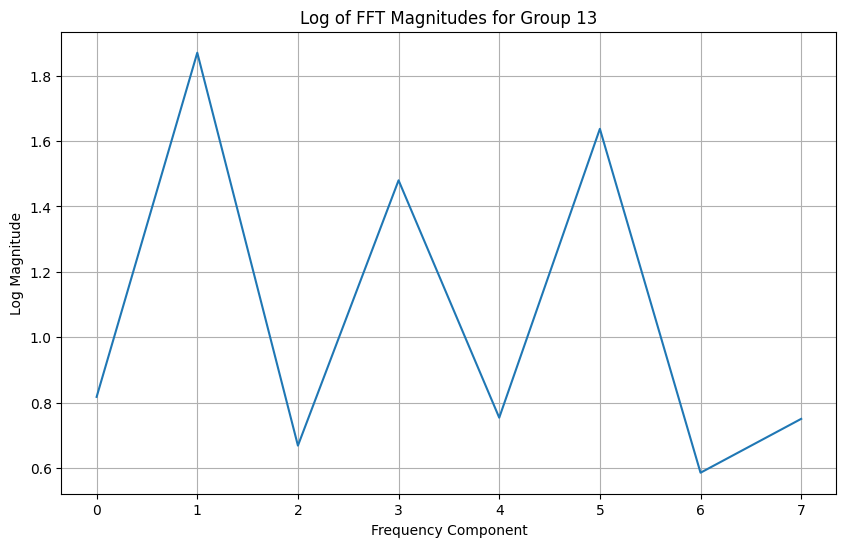

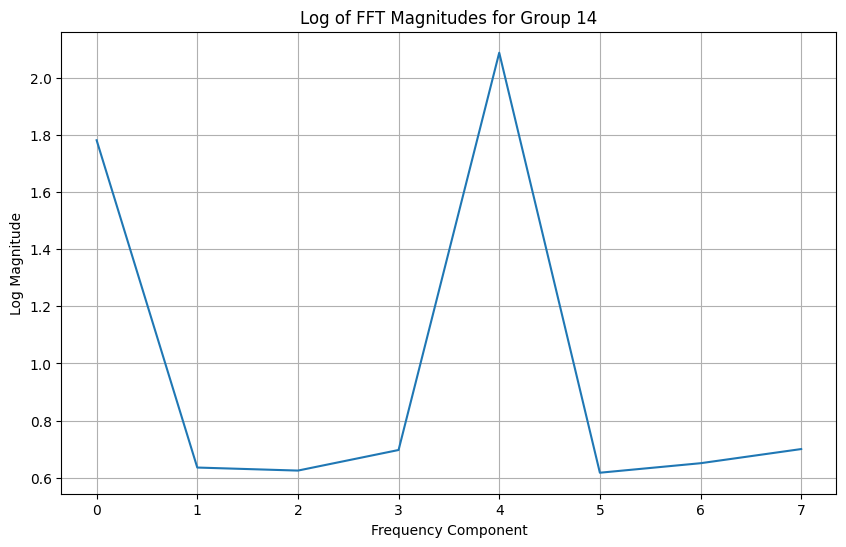

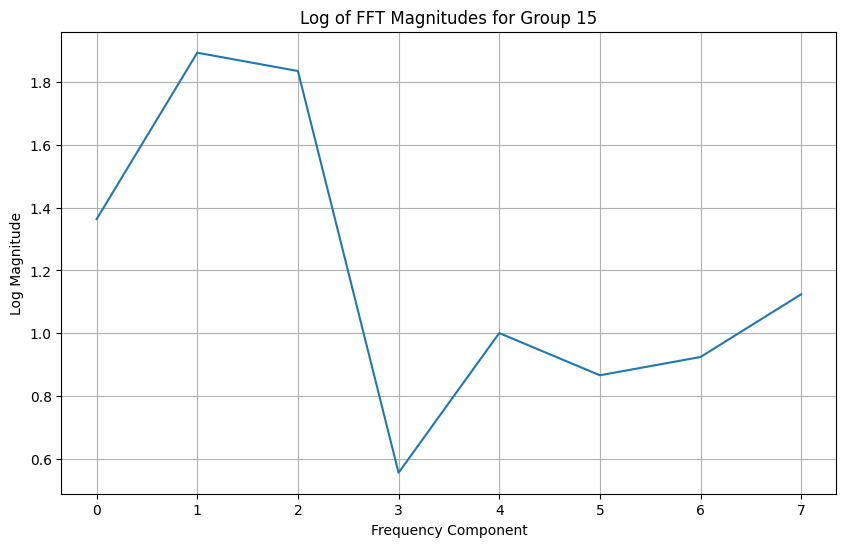

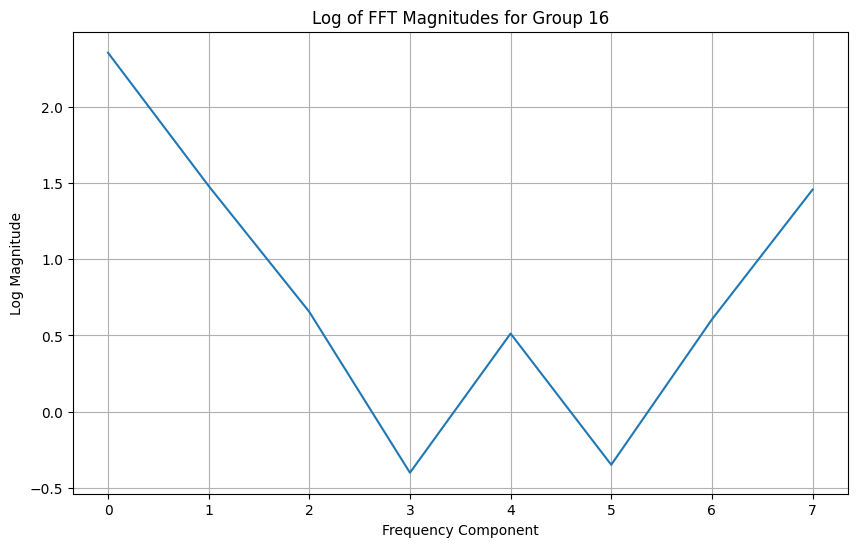

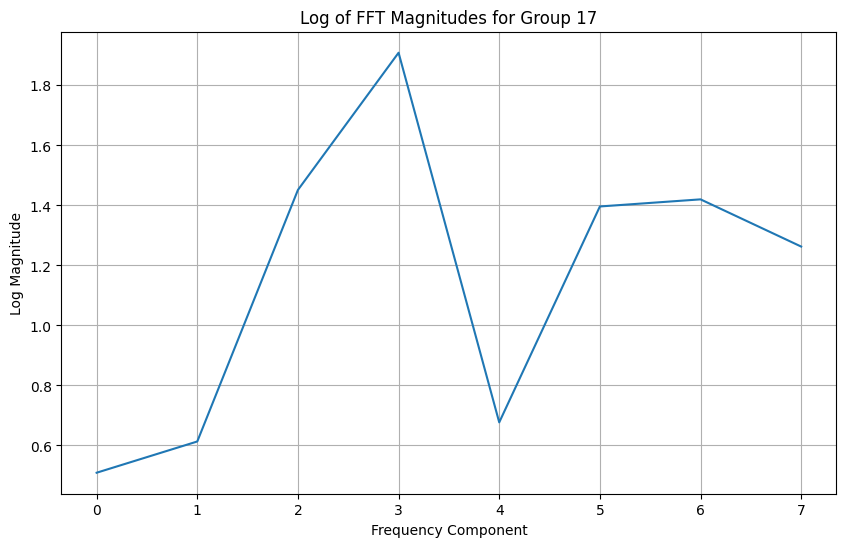

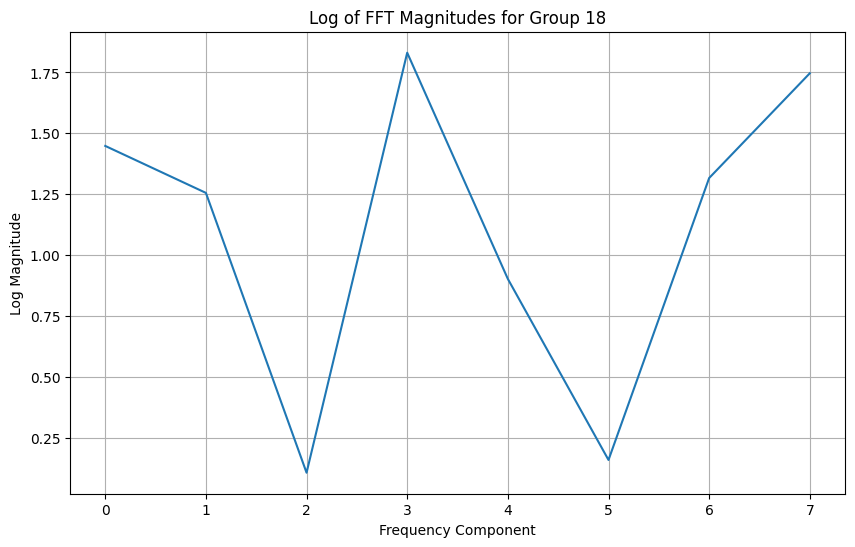

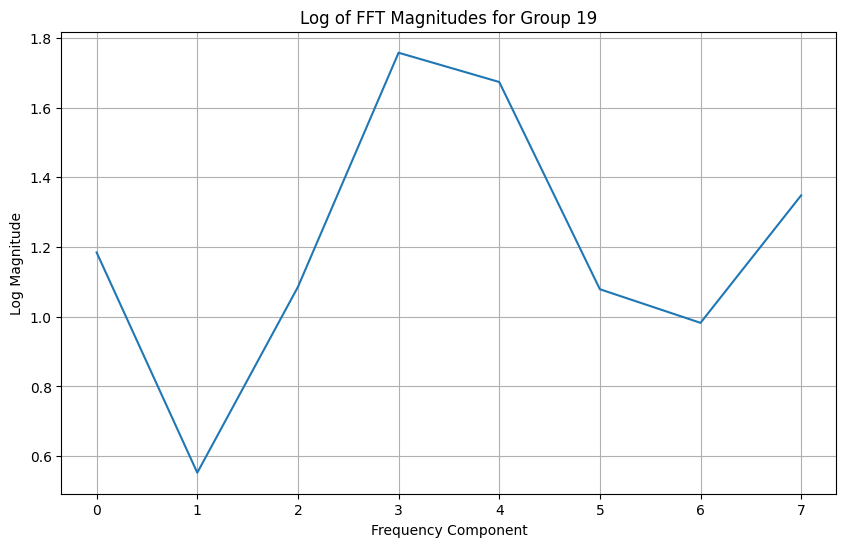

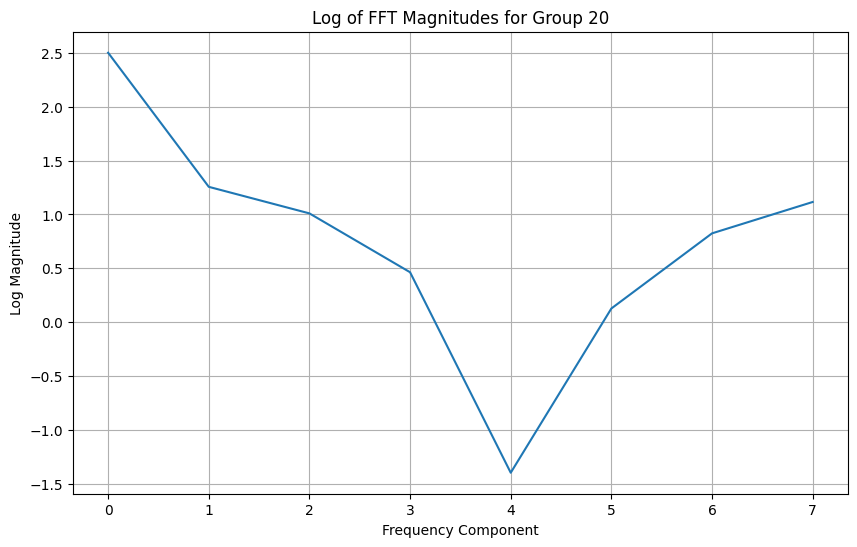

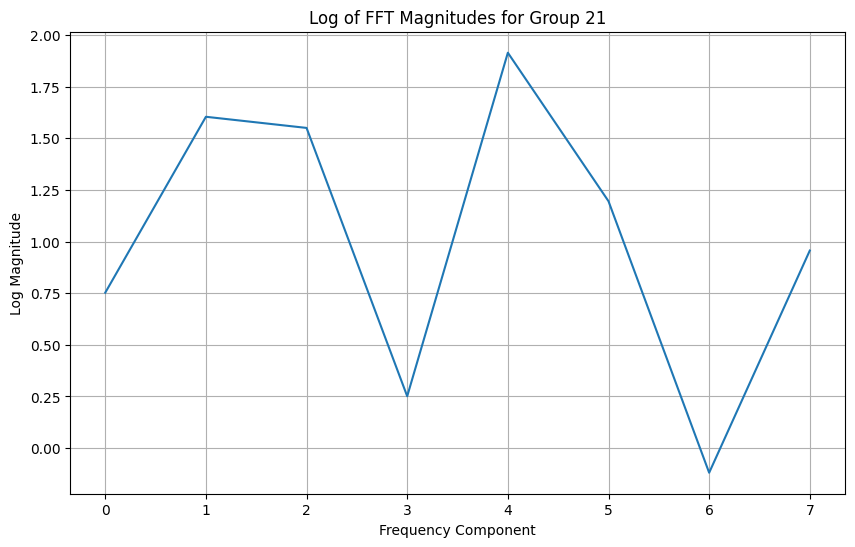

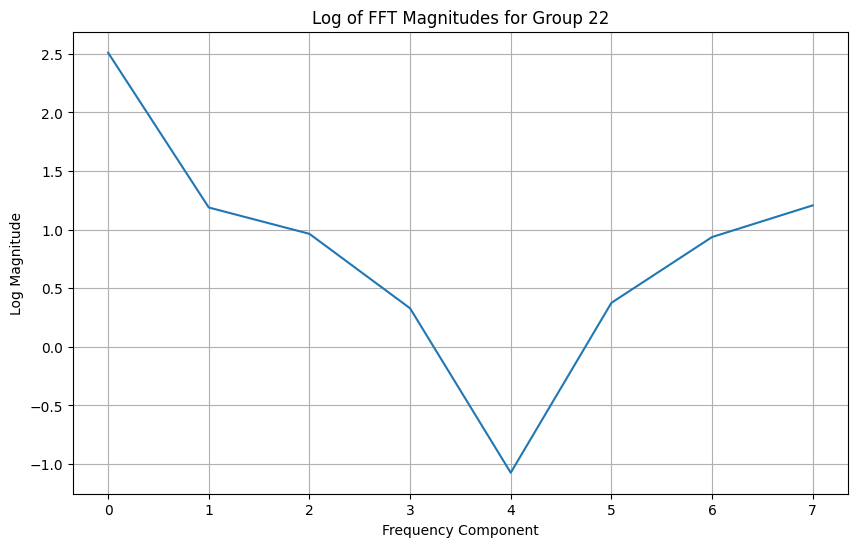

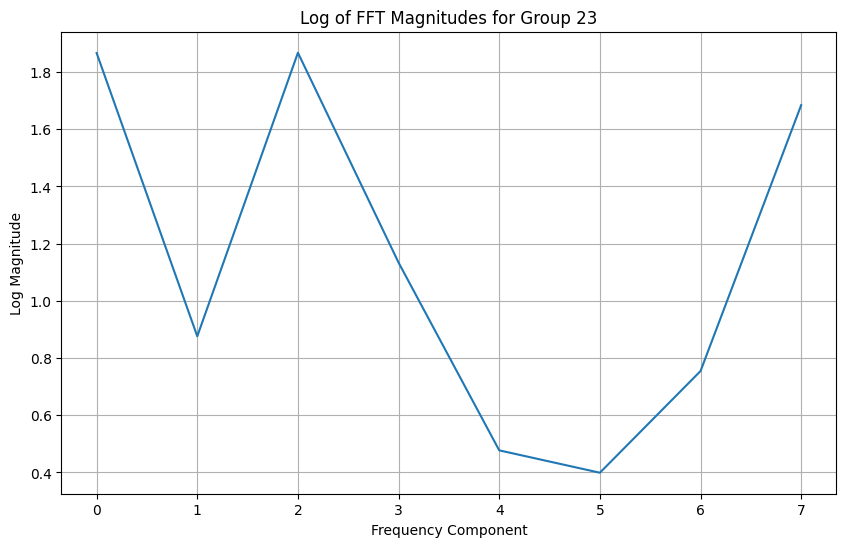

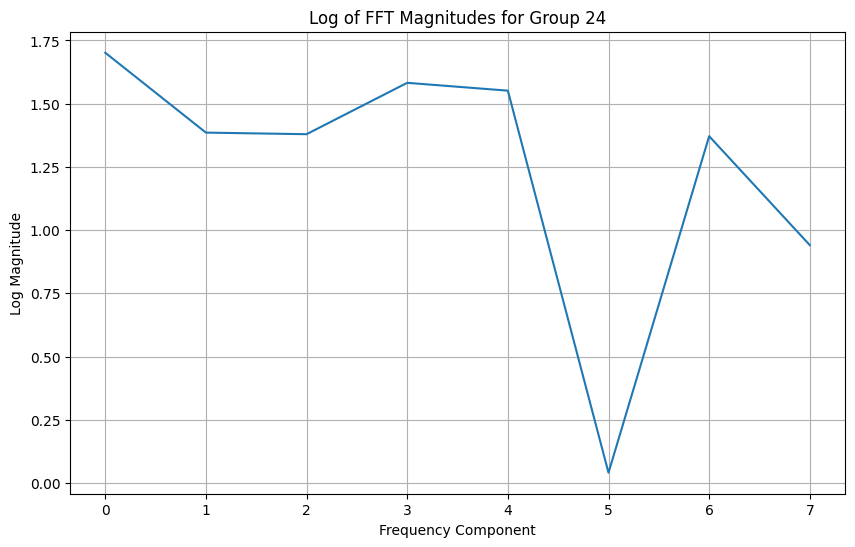

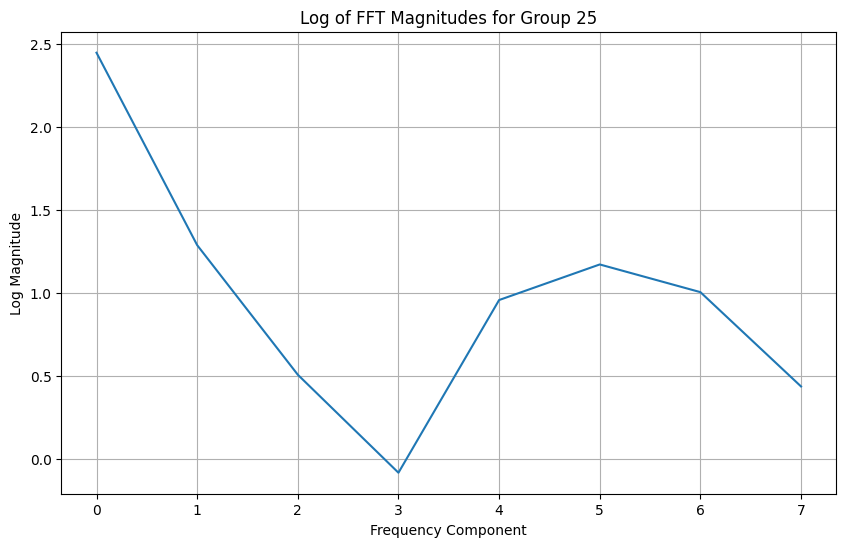

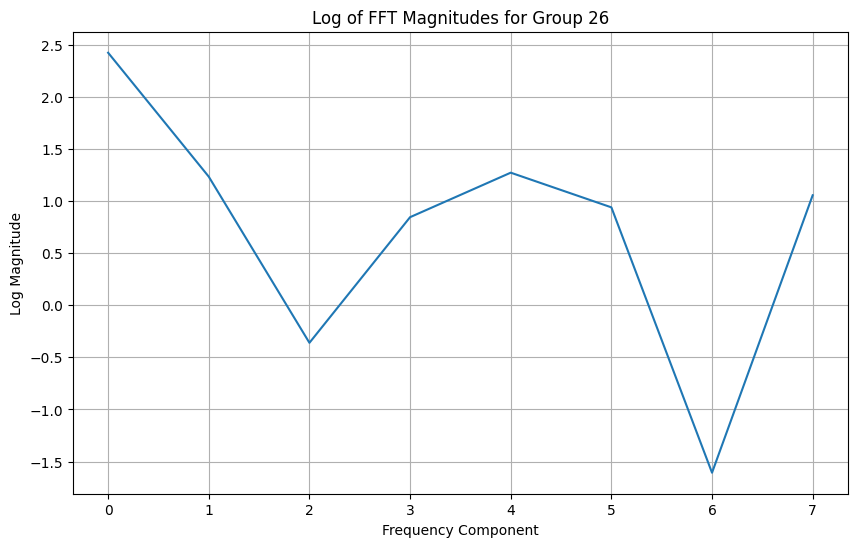

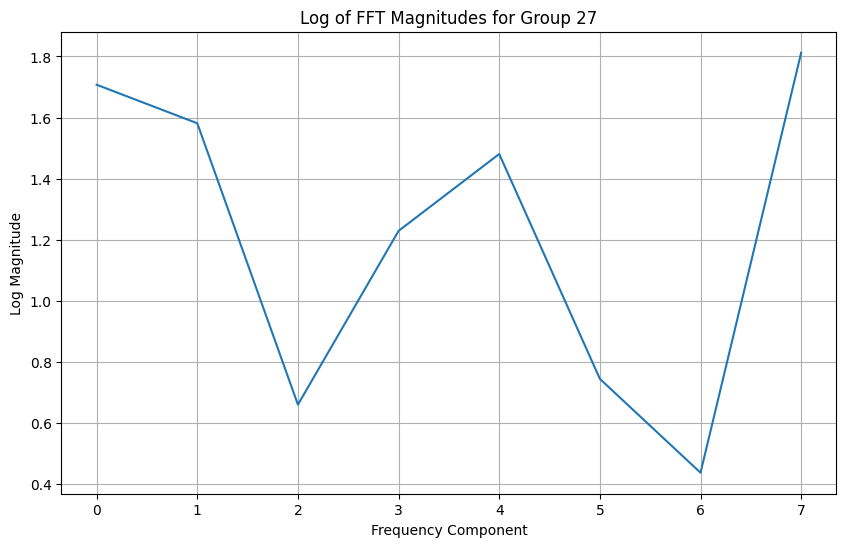

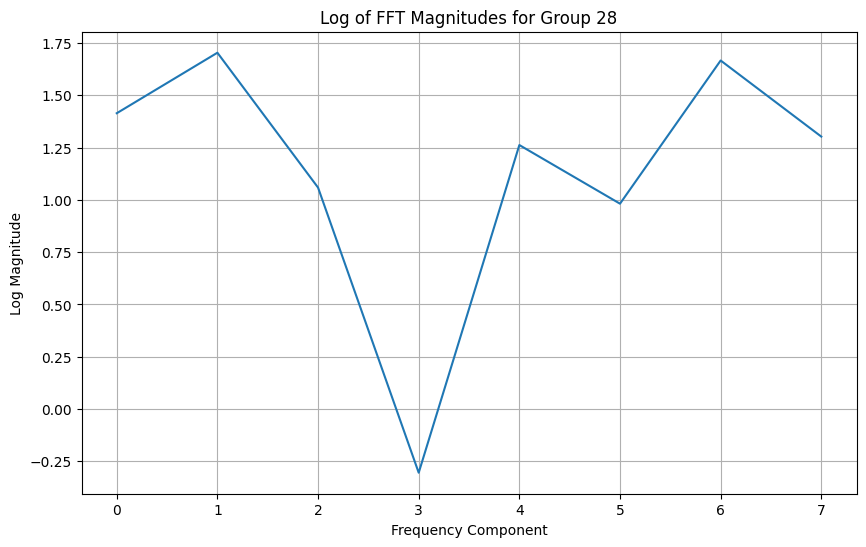

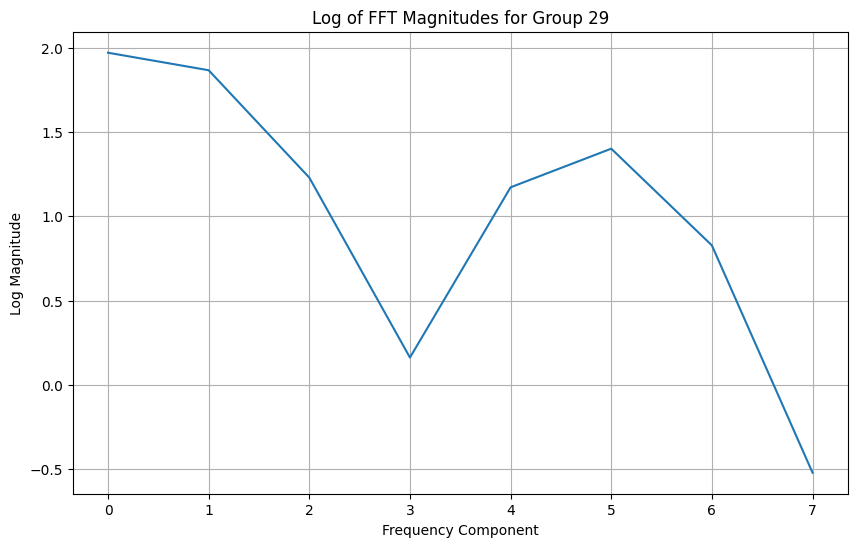

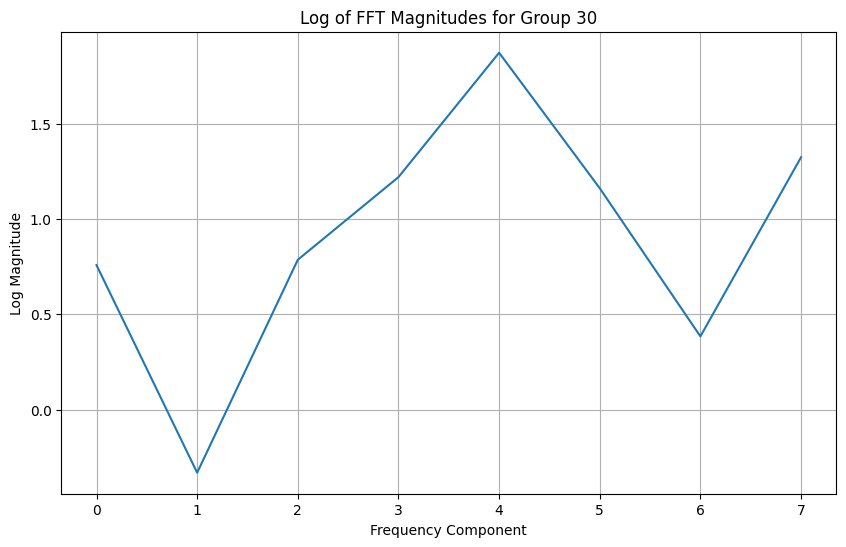

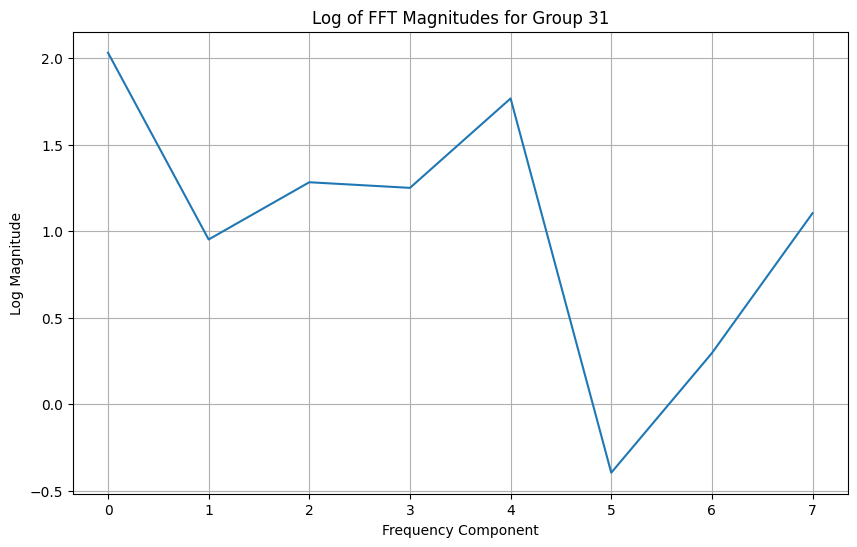

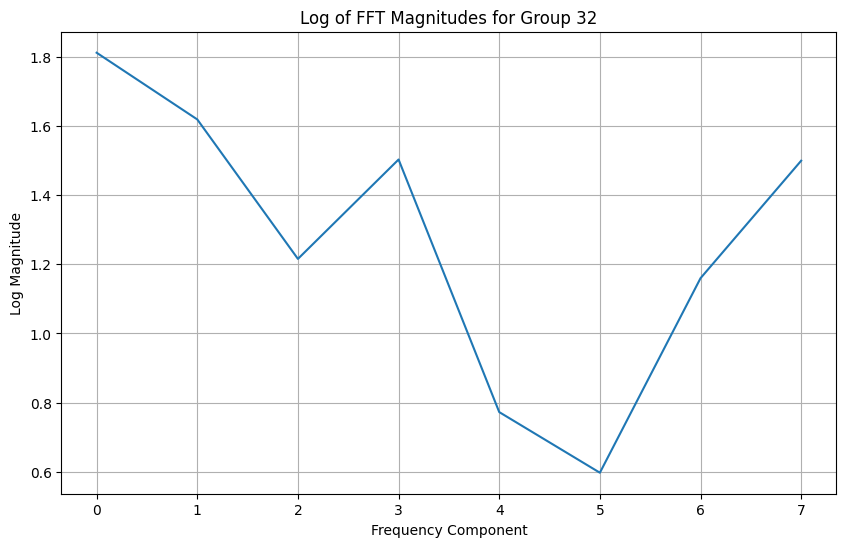

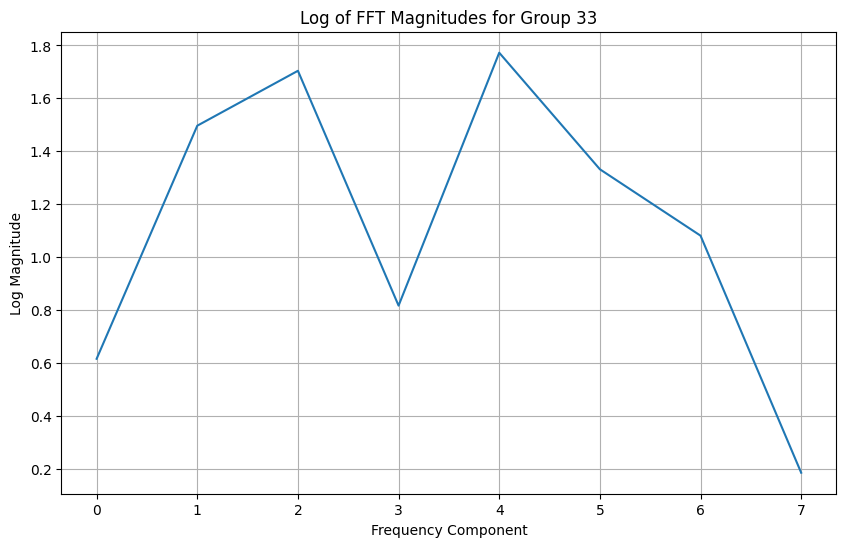

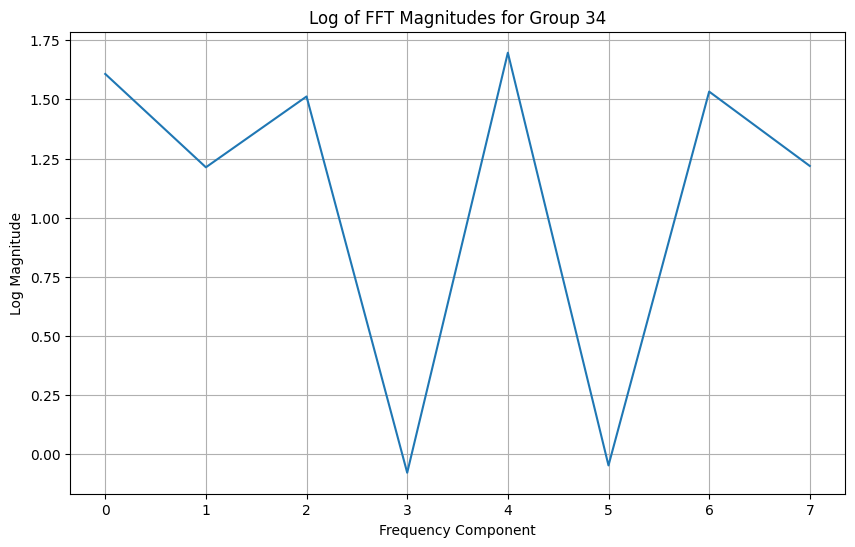

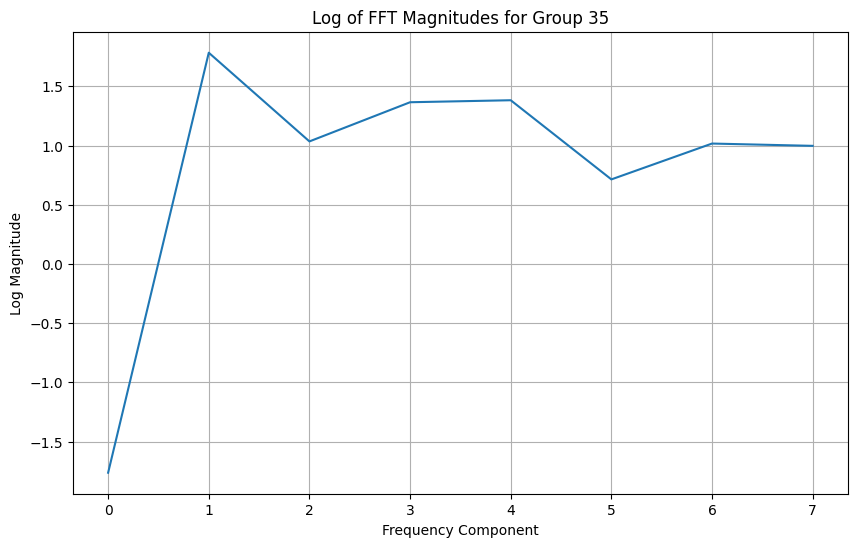

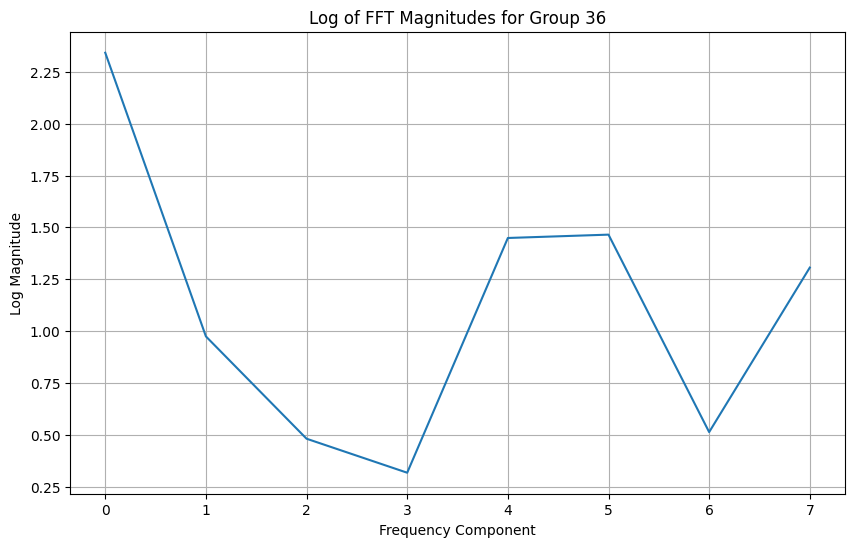

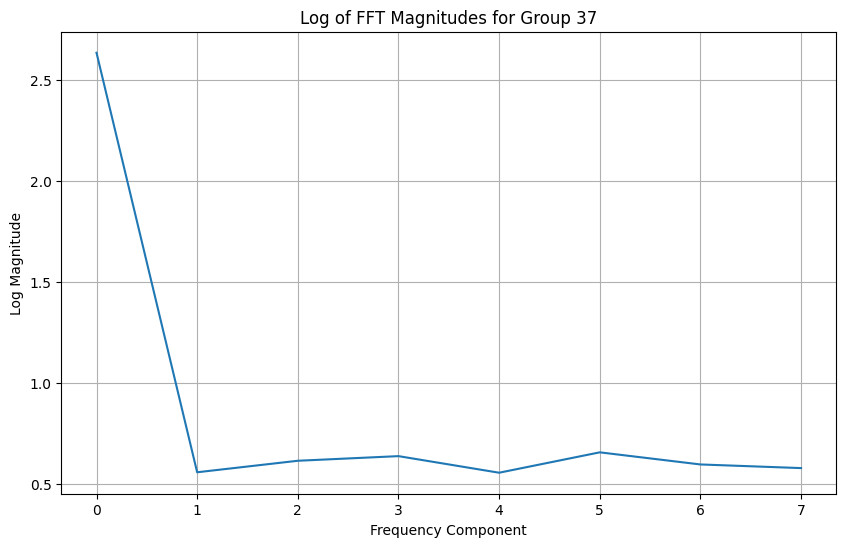

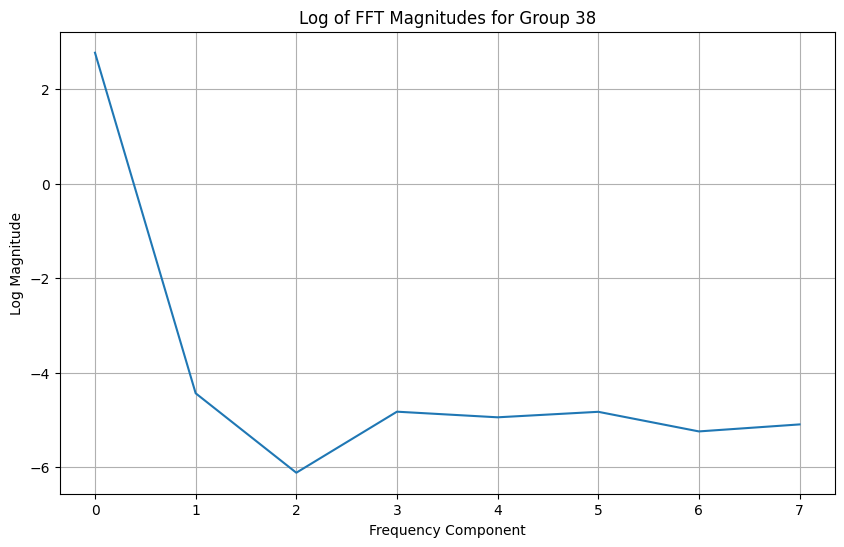

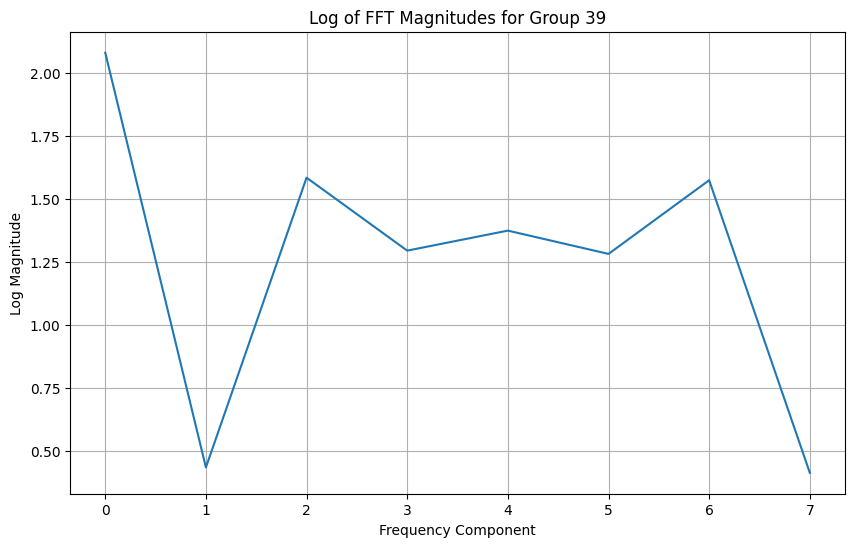

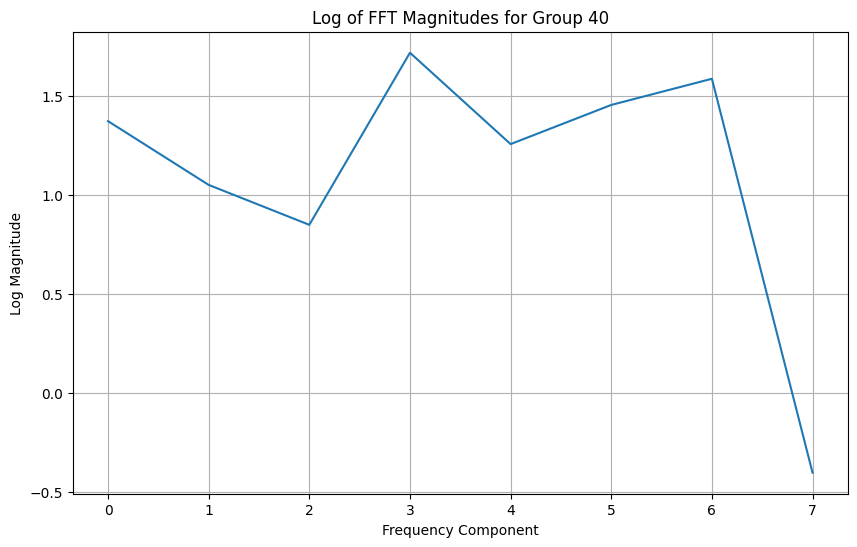

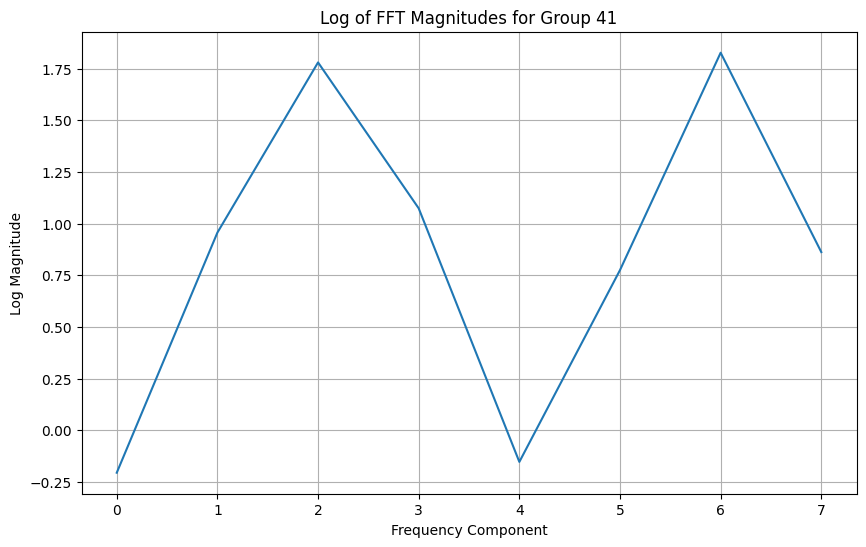

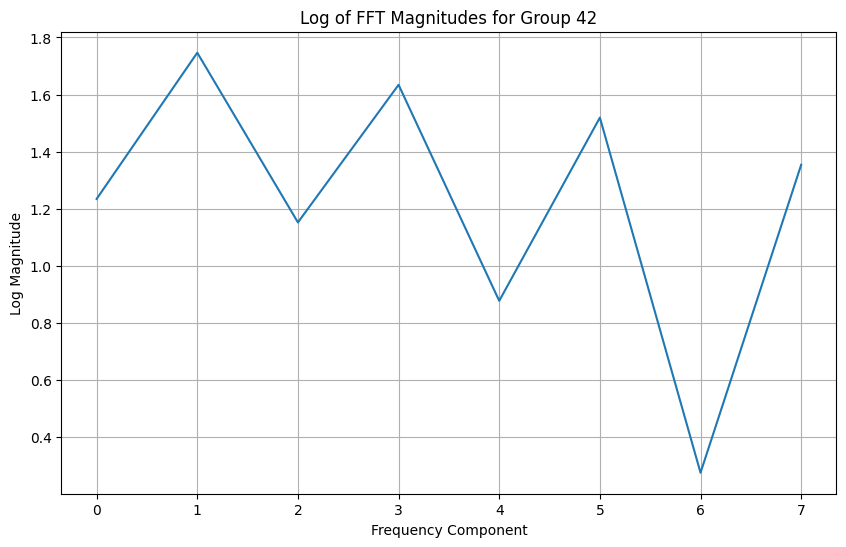

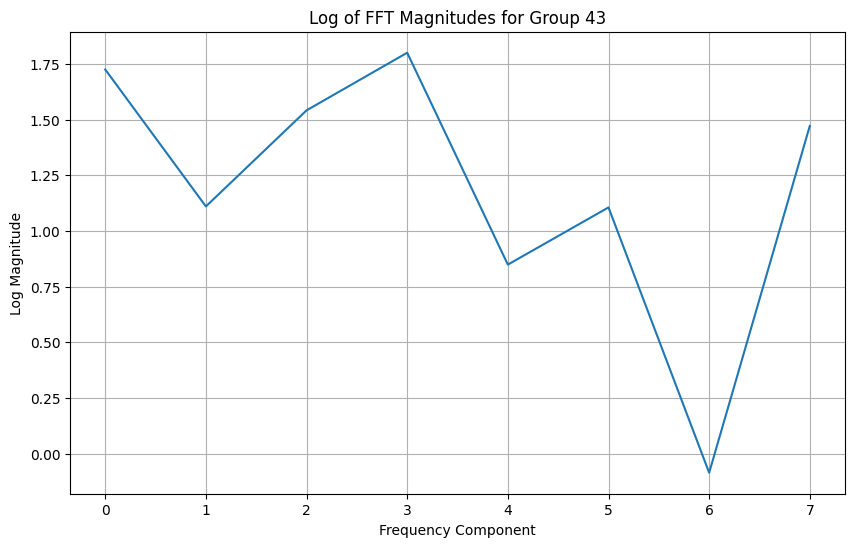

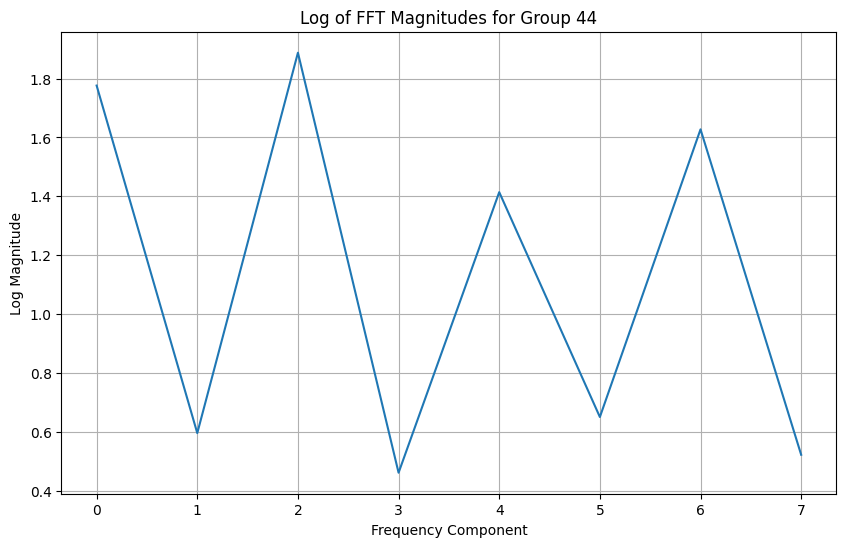

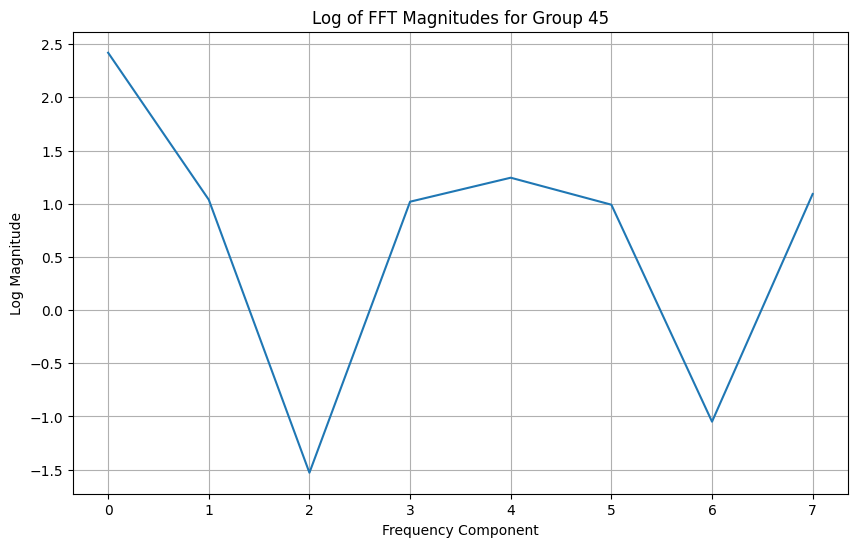

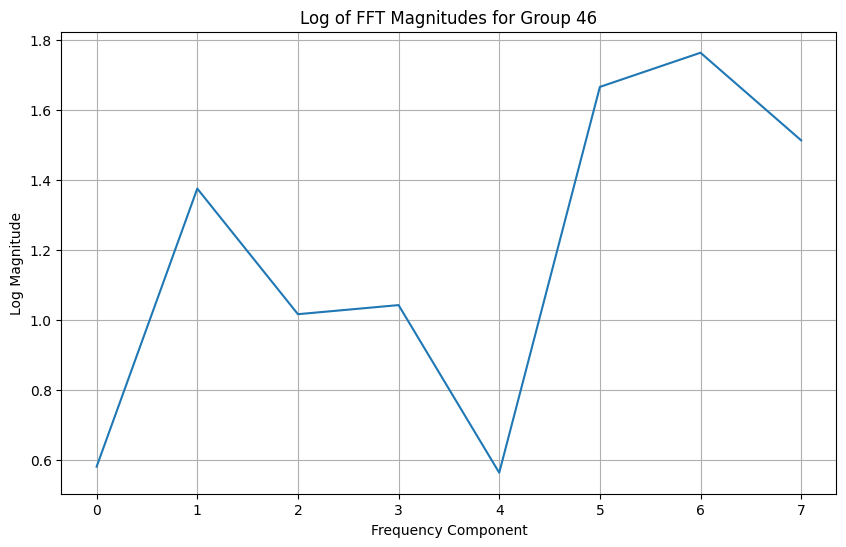

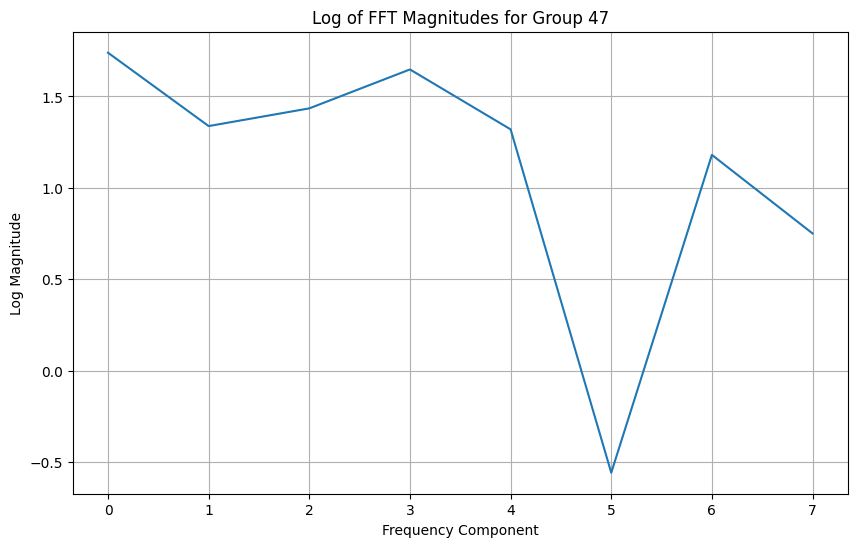

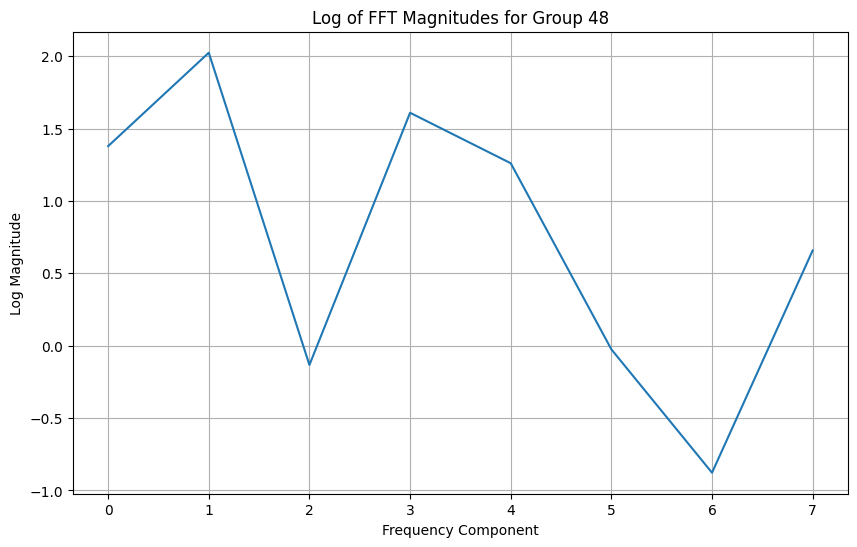

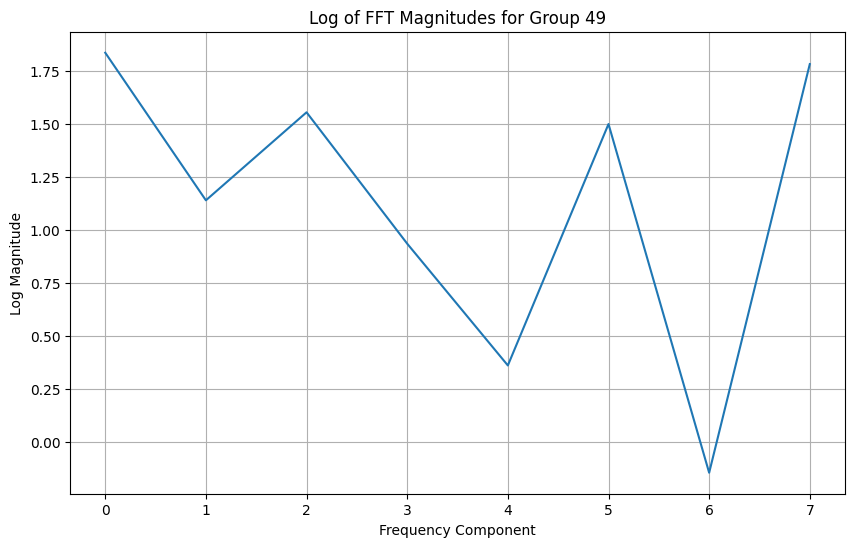

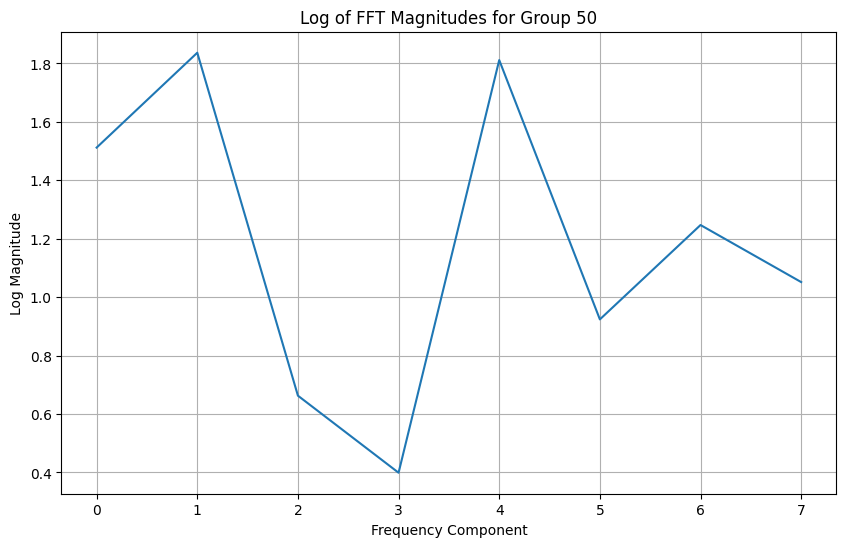

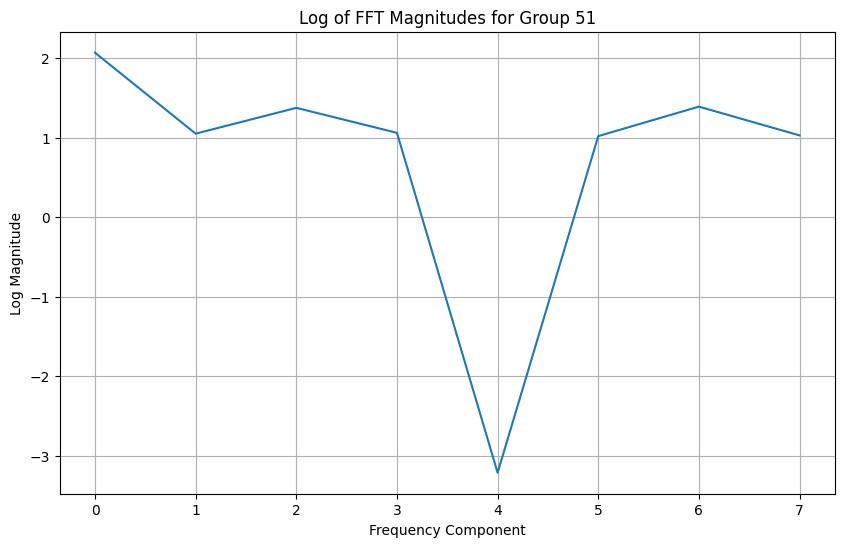

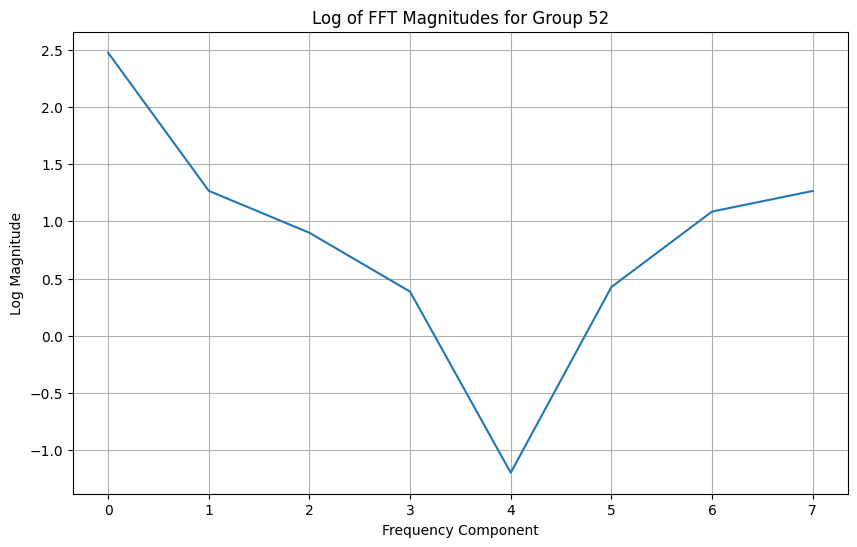

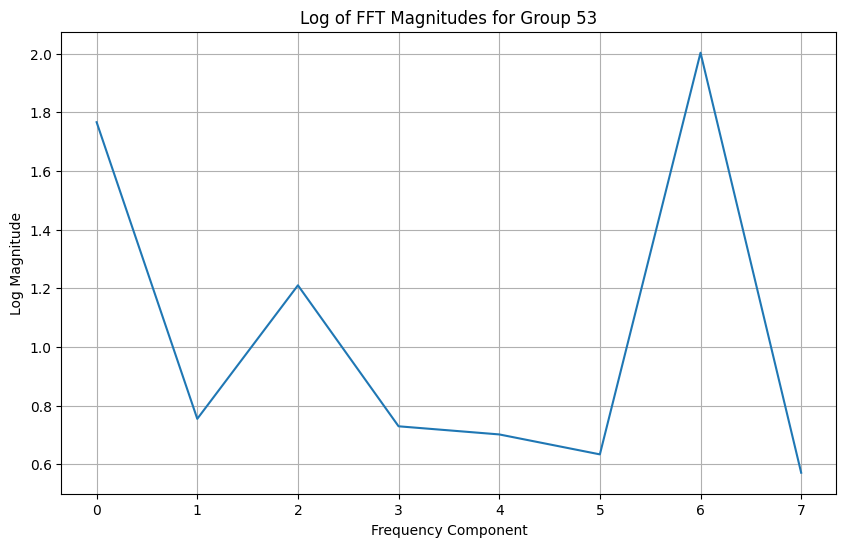

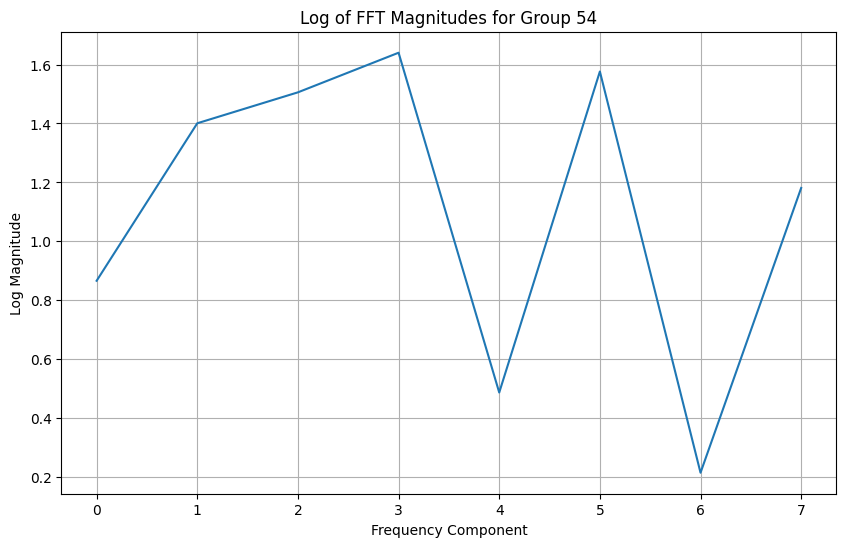

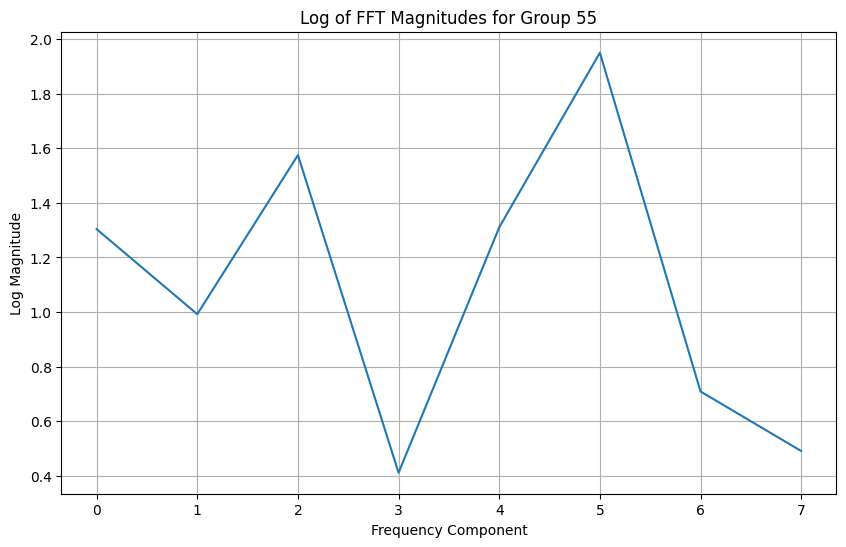

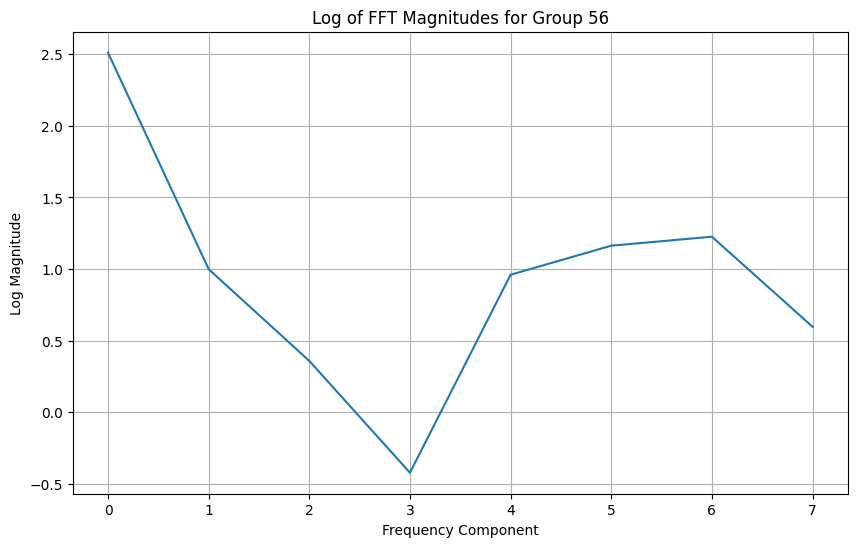

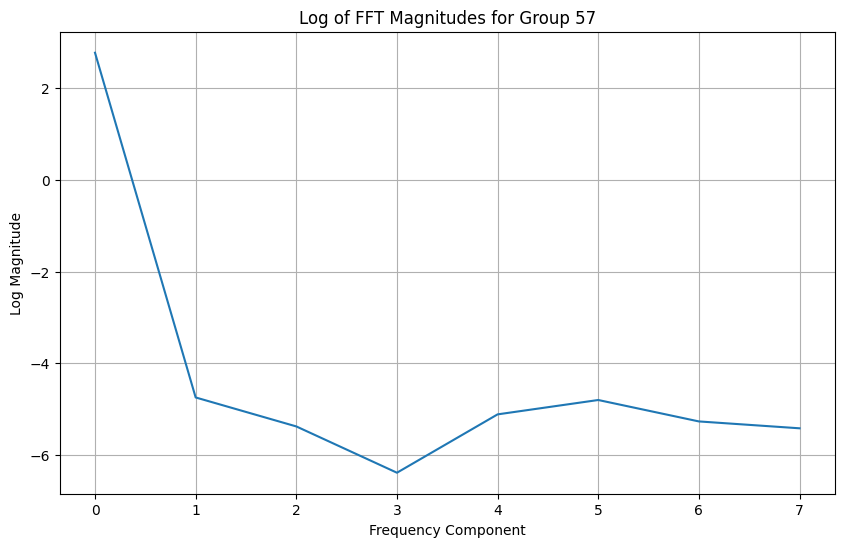

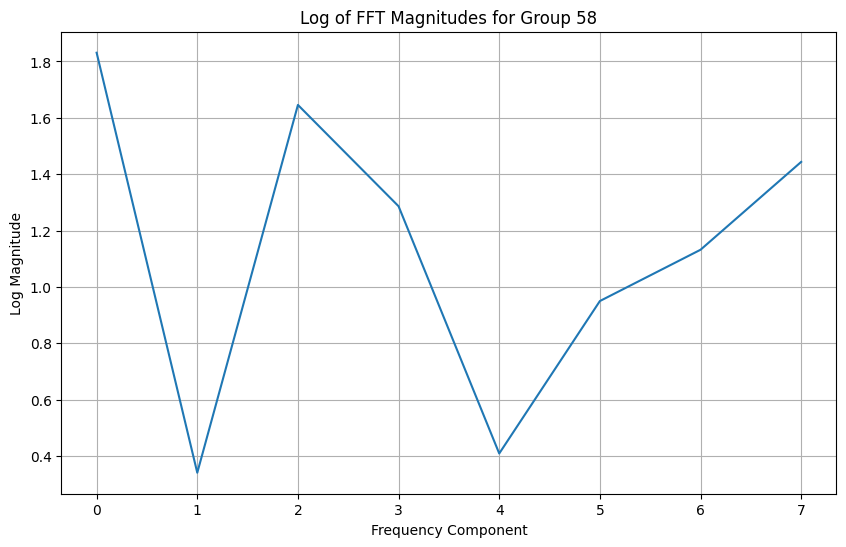

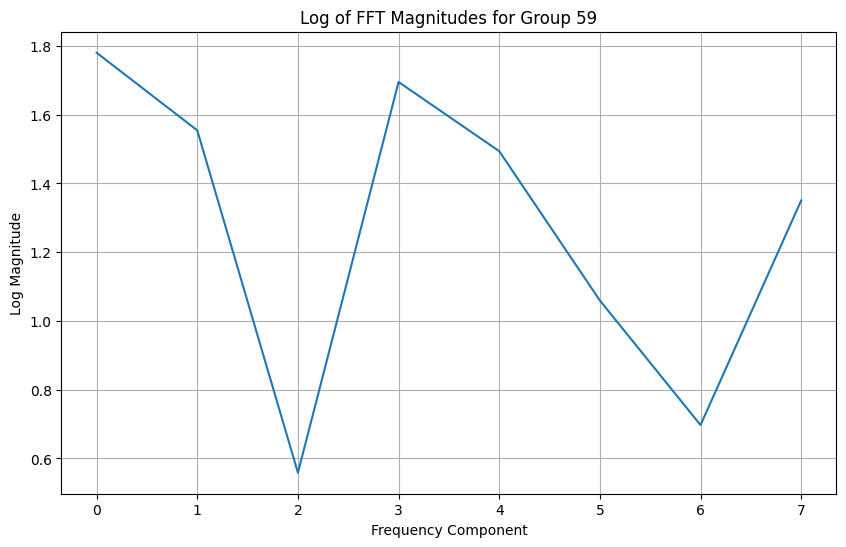

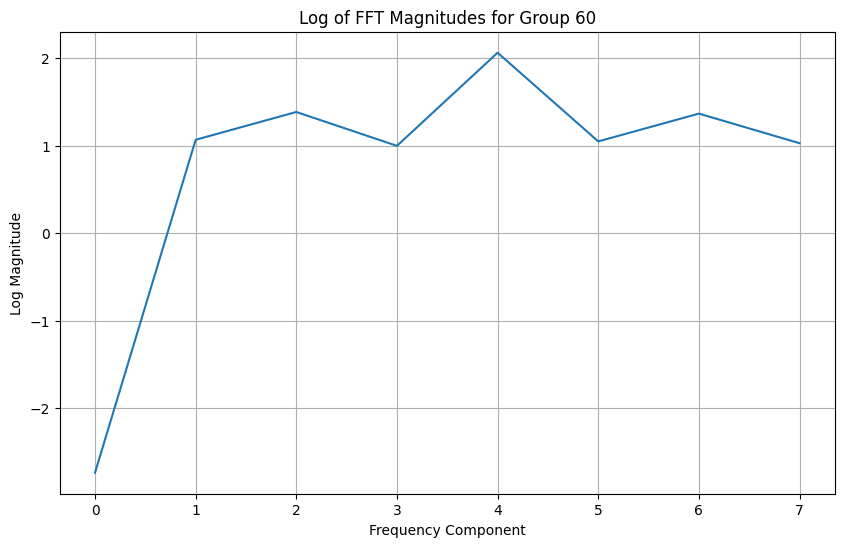

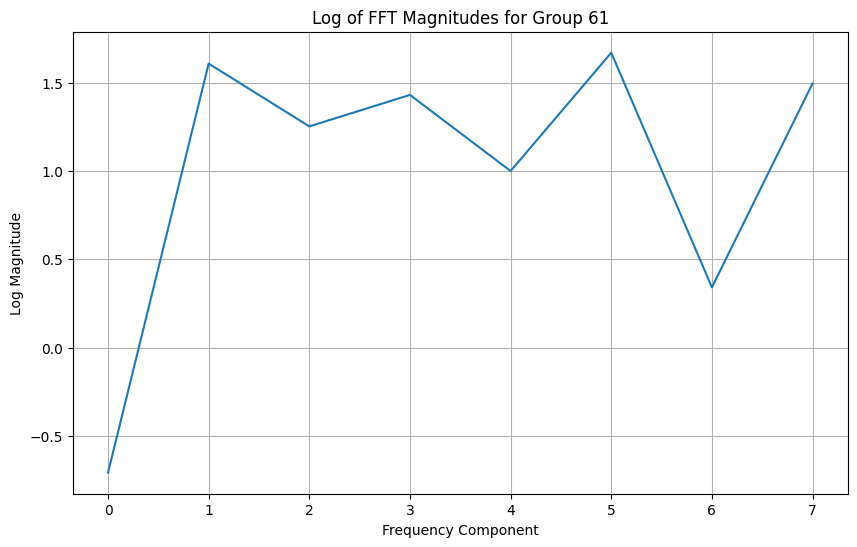

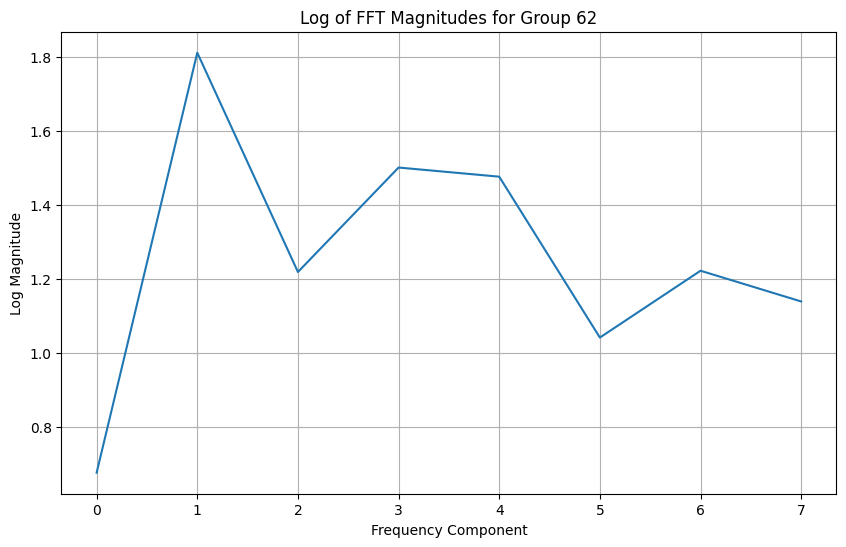

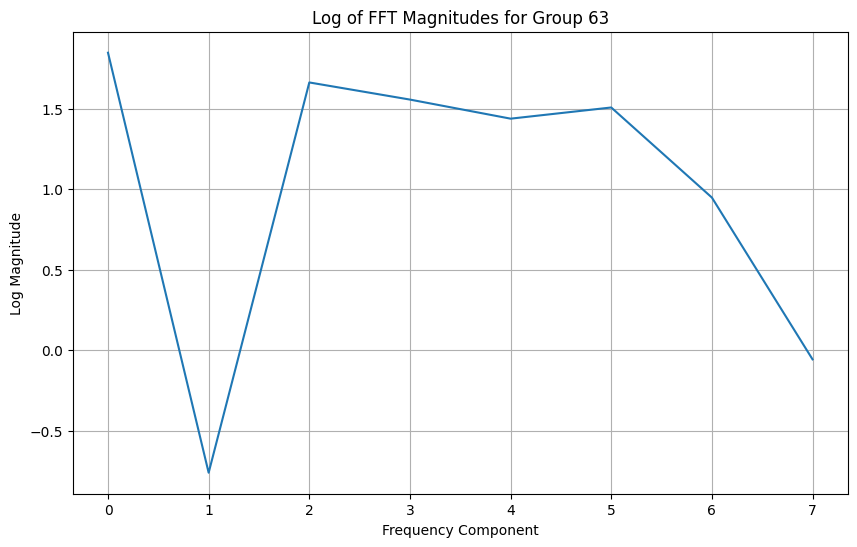

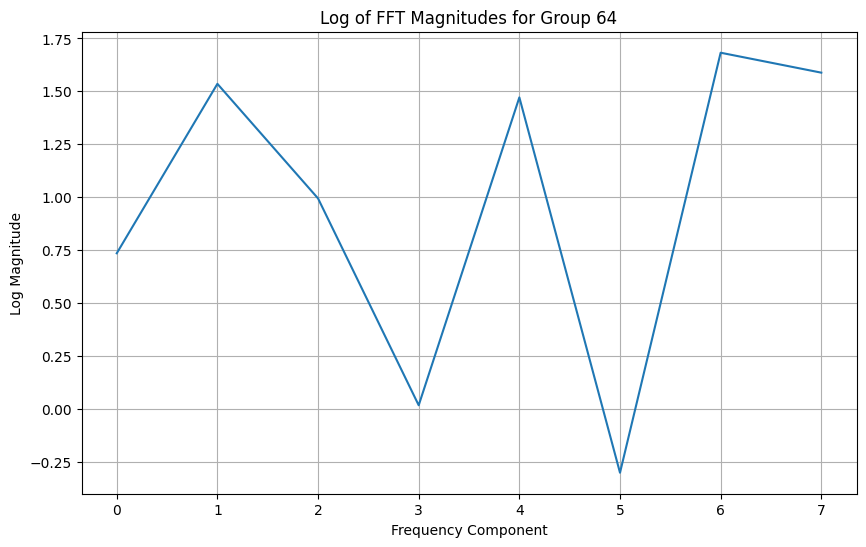

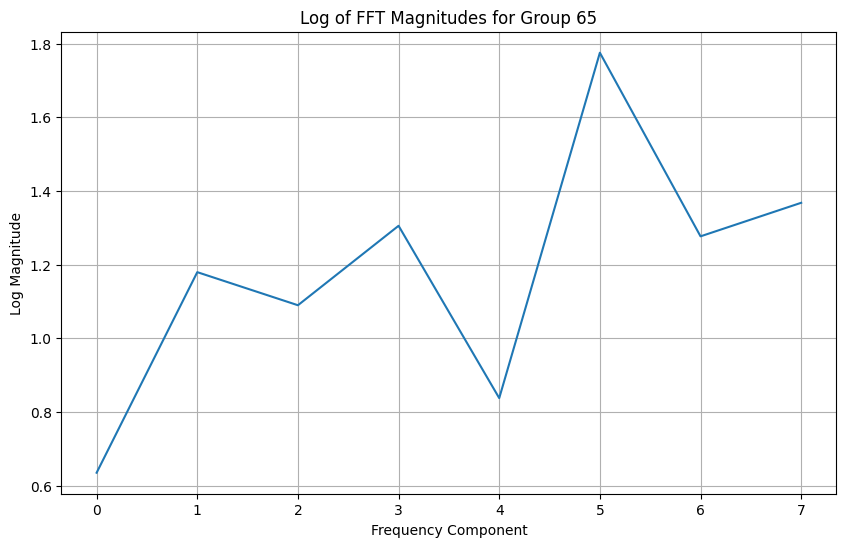

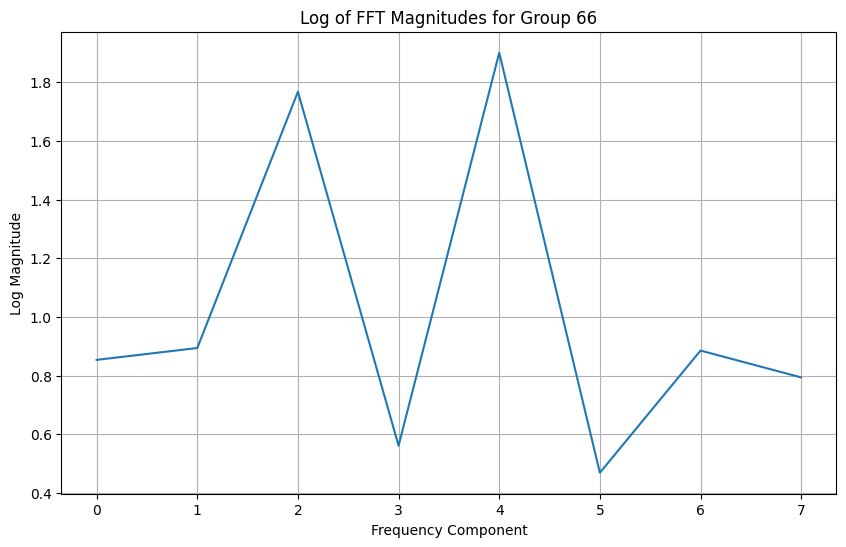

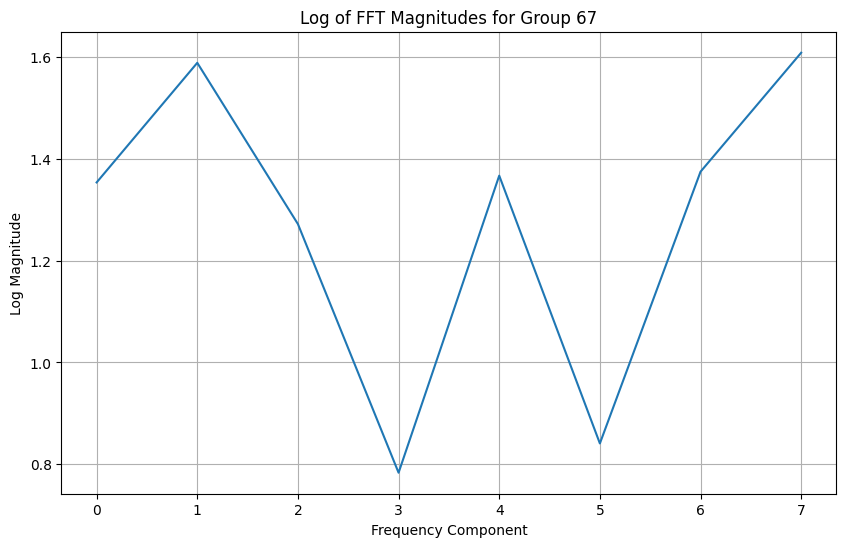

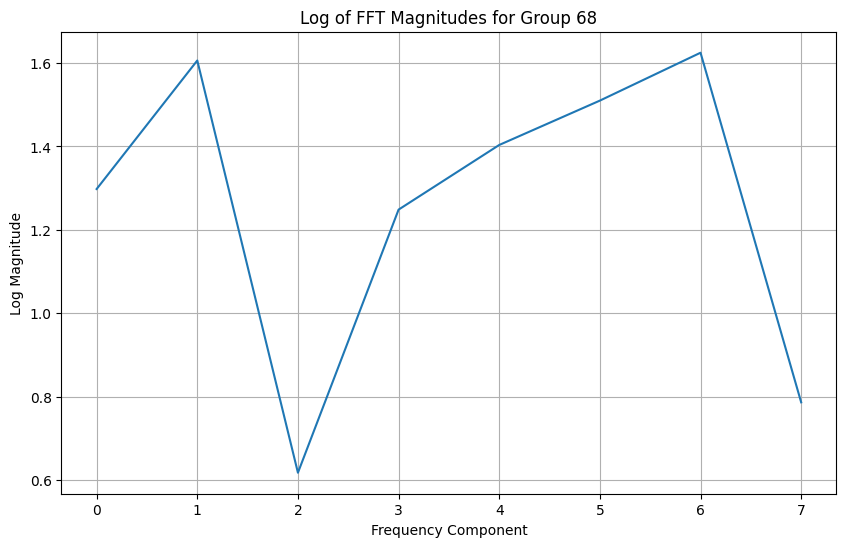

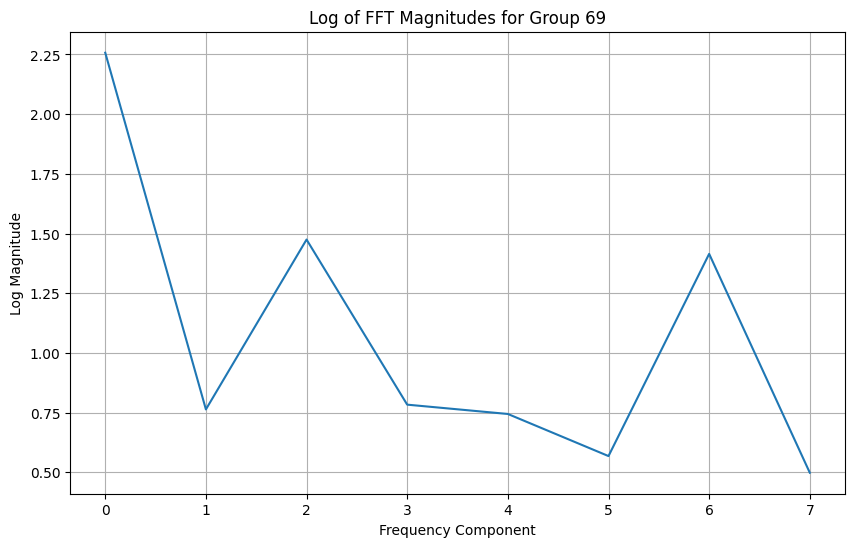

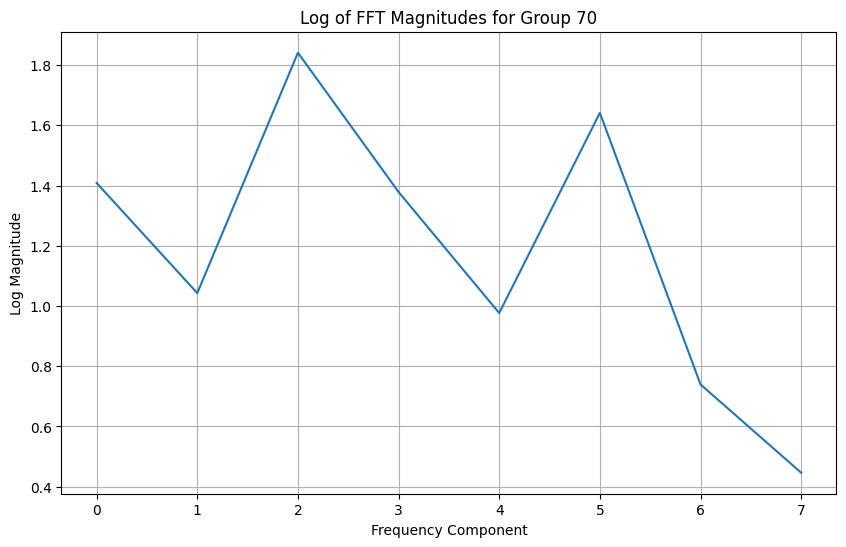

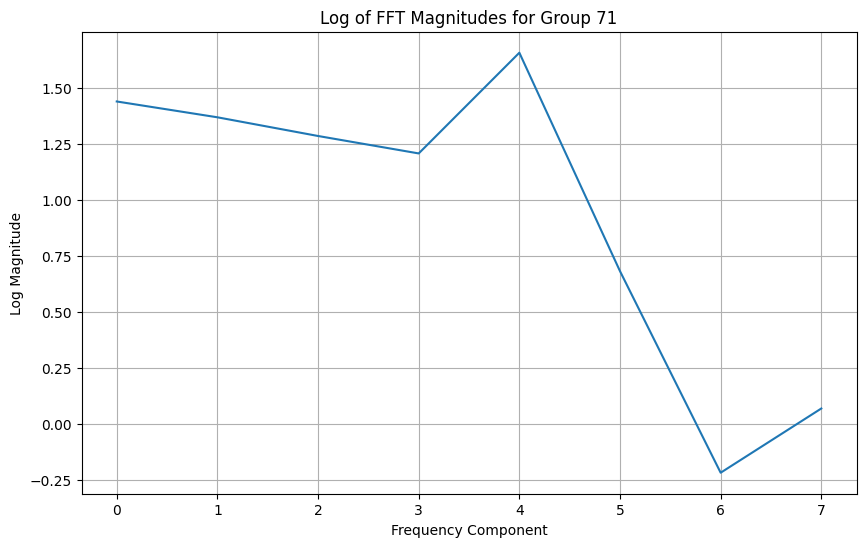

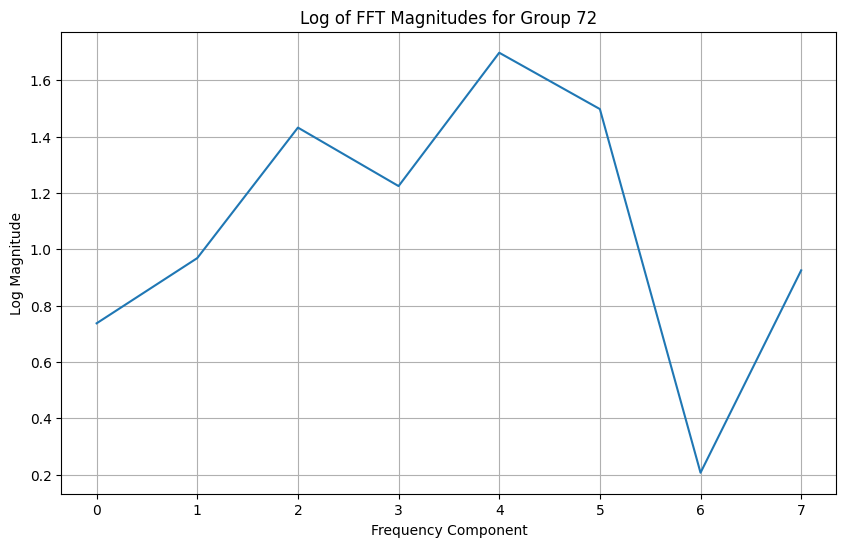

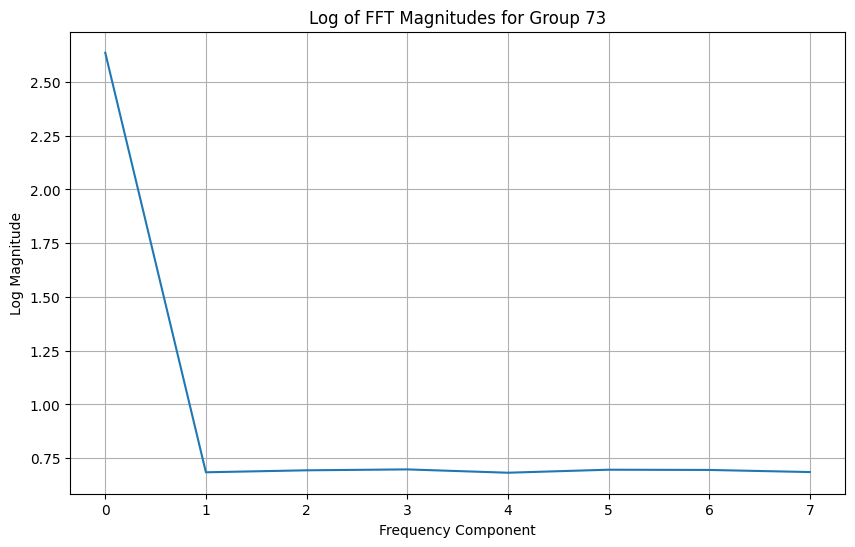

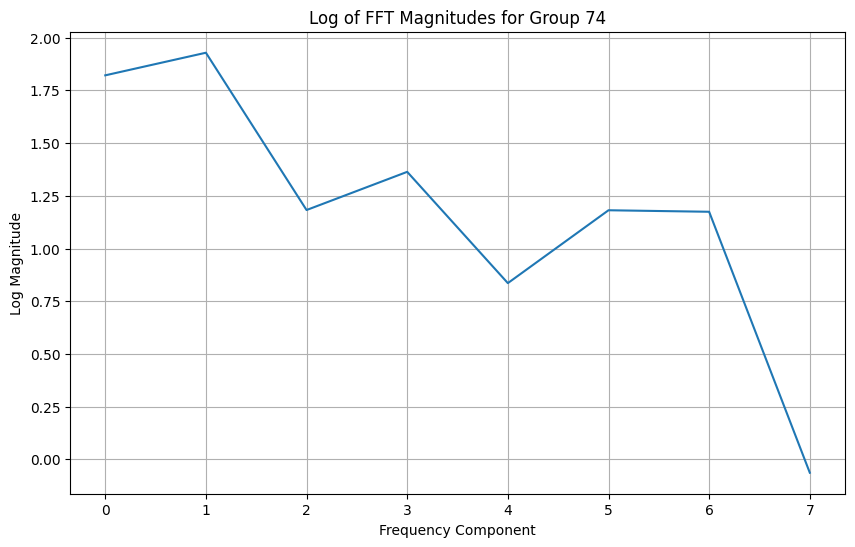

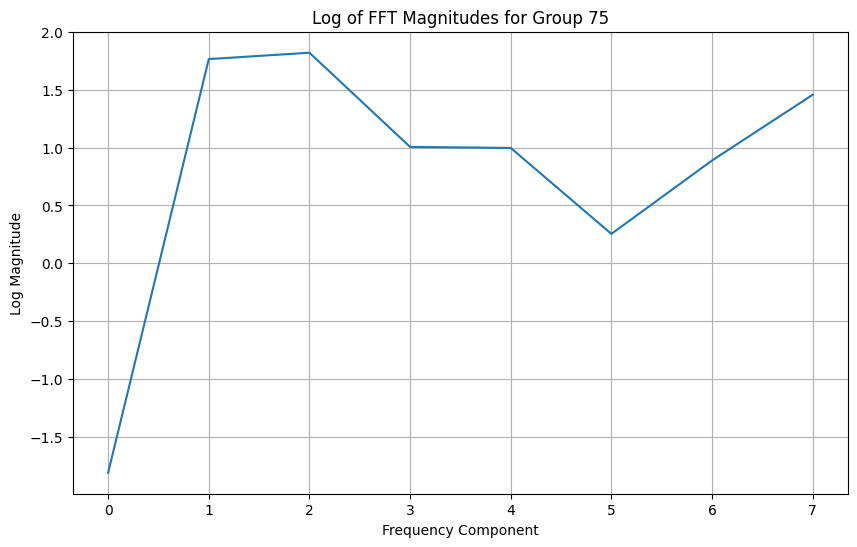

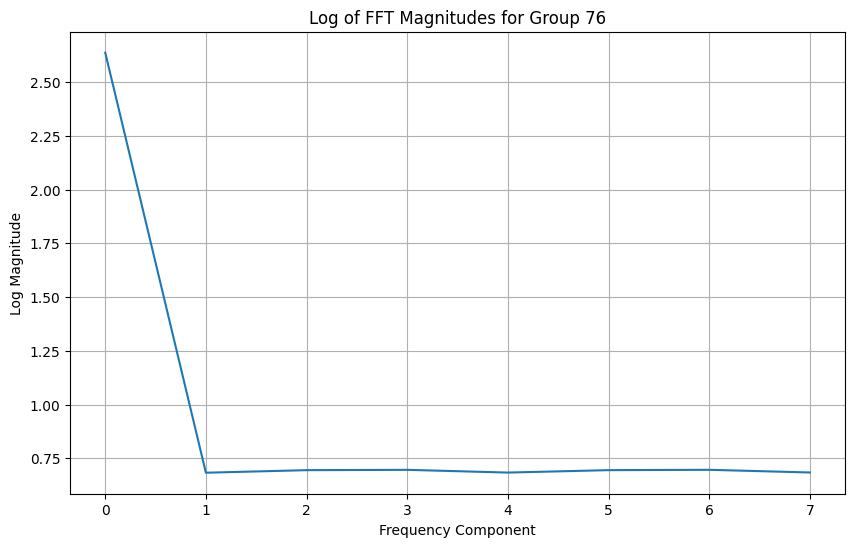

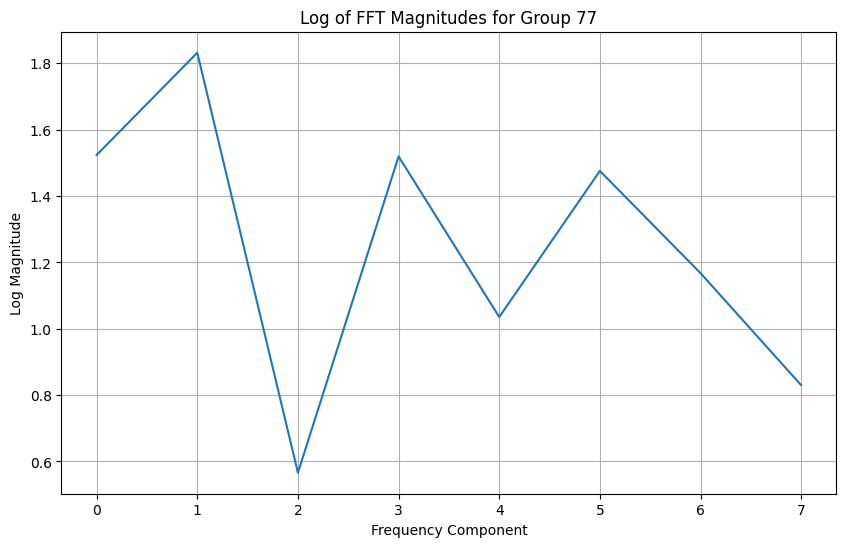

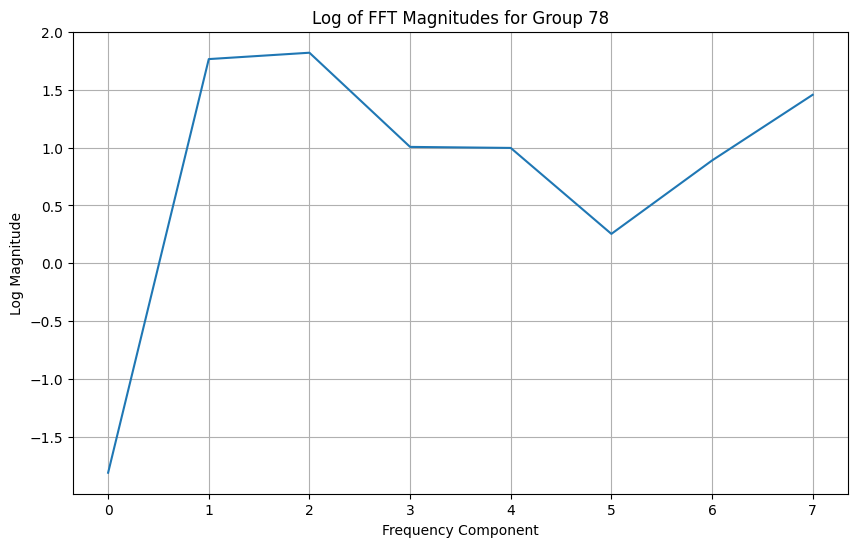

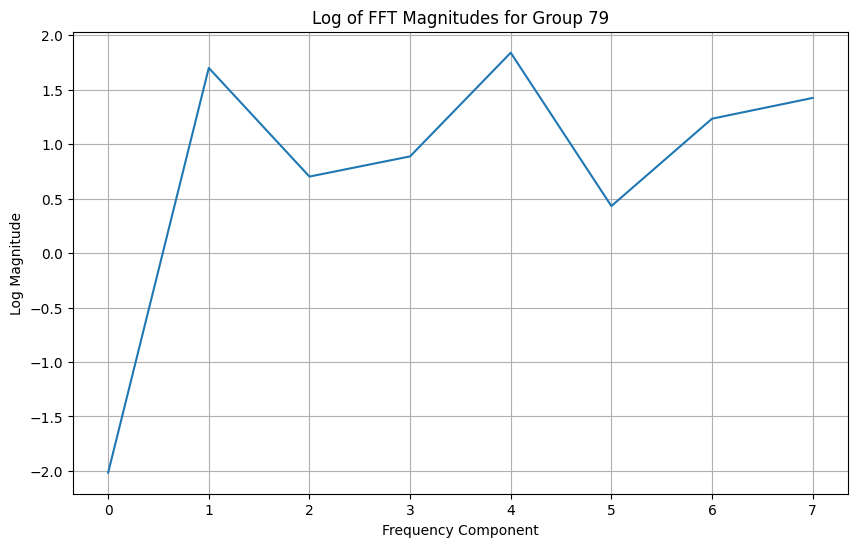

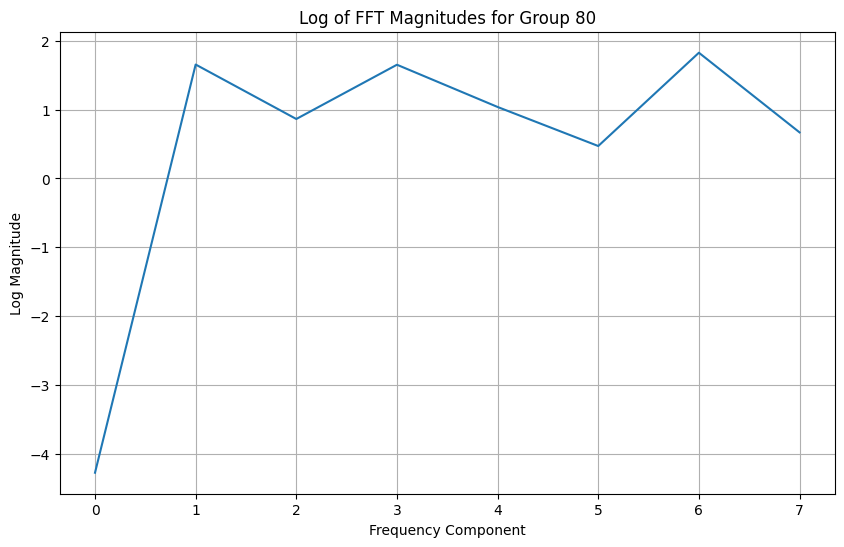

In [99]:
for i, df in enumerate(dfs):
    plot_fft(df, f"Group {i+1}")

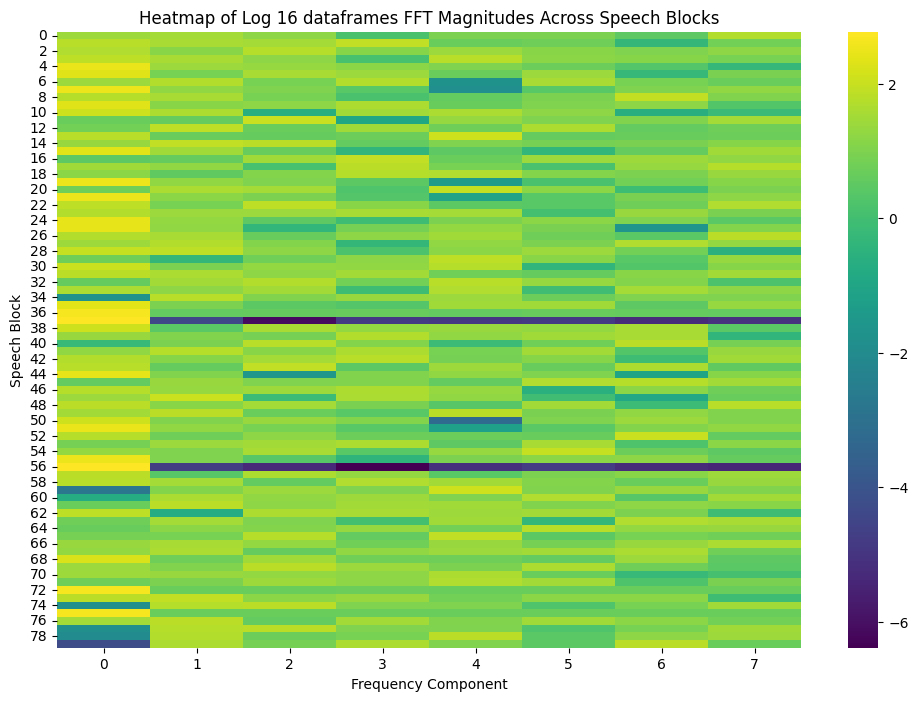

In [101]:
log_fft_magnitudes_list = [compute_log_fft_magnitudes(df) for df in dfs]
log_fft_magnitudes_matrix = np.vstack(log_fft_magnitudes_list)

plt.figure(figsize=(12, 8))
sns.heatmap(log_fft_magnitudes_matrix, cmap='viridis', cbar=True)
plt.title('Heatmap of Log 16 dataframes FFT Magnitudes Across Speech Blocks')
plt.xlabel('Frequency Component')
plt.ylabel('Speech Block')
plt.show()
